
# 🩺 MUSIC Dataset - Sudden Cardiac Death in Chronic Heart Failure  

## 📌 **Dataset Summary**
The MUSIC dataset (Sudden Cardiac Death in Chronic Heart Failure) is a medical dataset containing clinical data from **992 patients** with **chronic heart failure (CHF)**. The dataset includes **103 variables**, covering patient demographics, vital signs, lab results, medical history, and medications.

## 📂 **Dataset Structure & Key Features**
The dataset consists of **numerical and categorical features**. Below is an overview of the key columns:

### **1️⃣ Patient Demographics**
- `Patient ID` → Unique identifier for each patient (not useful for modeling)
- `Age` → Patient's age (years)
- `Gender (male=1)` → 1 = Male, 0 = Female

### **2️⃣ Clinical Follow-up**
- `Follow-up period from enrollment (days)` → Number of days the patient was followed up in the study
- `Exit of the study` → Indicates if the patient left the study (many missing values)
- `Cause of death` → Patient's cause of death (target variable for classification)

### **3️⃣ Target Variable (Binary Classification)**
- `"Cause of death"` contains the following categories:
  - `0` → **Survivor (Alive)**
  - `1` → **Non-cardiac death**
  - `3` → **Sudden Cardiac Death (SCD)**
  - `6-7` → **Pump failure death**
- **New binary target variable:**
  - `"Survived"` = `0` if **alive**, `1` if **deceased (any cause)**

### **4️⃣ Vital Signs & Lab Results**
- `Systolic blood pressure (mmHg)`, `Diastolic blood pressure (mmHg)` → Blood pressure readings
- `Body Mass Index (Kg/m2)` → BMI of the patient
- `Heart rate (bpm)`, `PR interval (ms)`, `QT interval (ms)` → ECG-related metrics
- `Pro-BNP (ng/L)`, `Troponin (ng/mL)`, `Creatinine (mmol/L)`, `Cholesterol (mmol/L)` → Key lab test values

### **5️⃣ Medical History & Risk Factors**
- `Diabetes (yes=1)`, `History of dyslipemia (yes=1)`, `History of hypertension (yes=1)`
- `Prior Myocardial Infarction (yes=1)`, `Peripheral vascular disease (yes=1)`

### **6️⃣ Medications**
- `Beta blockers (yes=1)`, `ACE inhibitors (yes=1)`, `Diuretics (yes=1)`, `Statins (yes=1)`, `Anticoagulants (yes=1)`
- **Binary format:** `1 = Medication used`, `0 = Not used`

---

## 🎯 **Objective of Machine Learning Model**
The goal of this project is to develop a **binary classification model** that predicts **patient survival** based on clinical features.

- **Target Variable:** `Survived`
  - `0` → Patient is **alive**
  - `1` → Patient **died** (any cause)
- **Approach:** Supervised Machine Learning (e.g., Logistic Regression, Random Forest)
- **Evaluation Metrics:** Accuracy, Precision, Recall, ROC-AUC

---

## 📌 **Resumen del Conjunto de Datos**
El conjunto de datos MUSIC (**Muerte Súbita en Insuficiencia Cardíaca Crónica**) contiene información clínica de **992 pacientes** con **insuficiencia cardíaca crónica (CHF)**. Contiene **103 variables**, incluyendo datos demográficos, signos vitales, resultados de laboratorio, antecedentes médicos y tratamientos.

### **📂 Estructura y Variables Clave**
#### **1️⃣ Demografía del Paciente**
- `Patient ID` → Identificador único (no útil para el modelo)
- `Age` → Edad del paciente (años)
- `Gender (male=1)` → 1 = Hombre, 0 = Mujer

#### **2️⃣ Seguimiento Clínico**
- `Follow-up period from enrollment (days)` → Número de días en el estudio
- `Exit of the study` → Indica si el paciente salió del estudio (muchos valores faltantes)
- `Cause of death` → Causa de muerte del paciente

#### **3️⃣ Variable Objetivo (Clasificación Binaria)**
- `"Cause of death"` tiene los siguientes valores:
  - `0` → **Sobreviviente (Vivo)**
  - `1` → **Muerte no cardíaca**
  - `3` → **Muerte súbita cardíaca (SCD)**
  - `6-7` → **Muerte por insuficiencia cardíaca**
- **Nueva variable binaria para predicción:**
  - `"Survived"` = `0` si **vivo**, `1` si **fallecido (cualquier causa)**

#### **4️⃣ Signos Vitales & Pruebas de Laboratorio**
- `Systolic blood pressure (mmHg)`, `Diastolic blood pressure (mmHg)` → Presión arterial
- `Body Mass Index (Kg/m2)` → Índice de Masa Corporal (IMC)
- `Heart rate (bpm)`, `QT interval (ms)` → Datos de ECG
- `Pro-BNP (ng/L)`, `Troponin (ng/mL)`, `Creatinine (mmol/L)`, `Cholesterol (mmol/L)`

#### **5️⃣ Antecedentes Médicos & Factores de Riesgo**
- `Diabetes (yes=1)`, `Hipertensión (yes=1)`, `Infarto previo (yes=1)`

#### **6️⃣ Medicamentos**
- `Beta blockers (yes=1)`, `Diuréticos (yes=1)`, `Estatinas (yes=1)`, `Anticoagulantes (yes=1)`
- **Formato binario:** `1 = Sí`, `0 = No`

---

## 🎯 **Objetivo del Modelo de Machine Learning**
El objetivo es desarrollar un modelo de **clasificación binaria** para predecir la **supervivencia de los pacientes** basada en variables clínicas.

- **Variable Objetivo:** `Survived`
  - `0` → Paciente **vivo**
  - `1` → Paciente **fallecido** (cualquier causa)
- **Enfoque:** Aprendizaje Supervisado (e.g., Regresión Logística, Random Forest)
- **Métricas de Evaluación:** Precisión, Recall, ROC-AUC


In [48]:
import os
print(os.listdir("./data"))


['subject-info.csv', 'subject-info_codes.csv', 'subject-info_definitions.csv']


In [60]:
import pandas as pd

with open("./data/subject-info.csv", "r", encoding="utf-8") as f:
    for i in range(5):  # Zeige die ersten 5 Zeilen
        print(f.readline())


Patient ID;Follow-up period from enrollment (days);days_4years;Exit of the study;Cause of death;Age;Gender (male=1);Weight (kg);Height (cm);Body Mass Index (Kg/m2);NYHA class;Diastolic blood  pressure (mmHg);Systolic blood pressure (mmHg);HF etiology - Diagnosis;Diabetes (yes=1);History of dyslipemia (yes=1);Peripheral vascular disease (yes=1);History of hypertension (yes=1);Prior Myocardial Infarction (yes=1);Prior implantable device;Prior Revascularization;Syncope;daily smoking (cigarretes/day);smoke-free time (years);cigarettes /year;alcohol consumption (standard units);Albumin (g/L);ALT or GPT (IU/L);AST or GOT (IU/L);Normalized Troponin;Total Cholesterol (mmol/L);Creatinine (?mol/L);Gamma-glutamil transpeptidase (IU/L);Glucose (mmol/L);Hemoglobin (g/L);HDL (mmol/L);Potassium (mEq/L);LDL (mmol/L);Sodium (mEq/L);Pro-BNP (ng/L);Protein (g/L);T3 (pg/dL);T4 (ng/L);Troponin (ng/mL);TSH (mIU/L);Urea (mg/dL);Signs of pulmonary venous hypertension (yes=1);Cardiothoracic ratio;Left atrial s

In [11]:
import pandas as pd

df = pd.read_csv("./data/subject-info.csv", sep=";", encoding="utf-8")
print(df.head())


  Patient ID  Follow-up period from enrollment (days)  days_4years  \
0      P0001                                     2065         1460   
1      P0002                                     2045         1460   
2      P0003                                     2044         1460   
3      P0004                                     2044         1460   
4      P0005                                     2043         1460   

   Exit of the study  Cause of death Age  Gender (male=1)  Weight (kg)  \
0                NaN               0  58                1           83   
1                NaN               0  58                1           74   
2                NaN               0  69                1           83   
3                NaN               0  56                0           84   
4                NaN               0  70                1           97   

   Height (cm) Body Mass Index (Kg/m2)  ...  \
0          163                    31,2  ...   
1          160                    28,9  

In [2]:
df.head()

Patient ID  Follow-up period from enrollment (days)  days_4years  \
0      P0001                                     2065         1460   
1      P0002                                     2045         1460   
2      P0003                                     2044         1460   
3      P0004                                     2044         1460   
4      P0005                                     2043         1460   

   Exit of the study  Cause of death Age  Gender (male=1)  Weight (kg)  \
0                NaN               0  58                1           83   
1                NaN               0  58                1           74   
2                NaN               0  69                1           83   
3                NaN               0  56                0           84   
4                NaN               0  70                1           97   

   Height (cm) Body Mass Index (Kg/m2)  ...  \
0          163                    31,2  ...   
1          160                    28,9  ...   
2          174                    27,4  ...   
3          165                    30,9  ...   
4          183                      29  ...   

   Angiotensin-II receptor blocker (yes=1)  \
0                                        0   
1                                        1   
2                                        1   
3                                        1   
4                                        0   

   Anticoagulants/antitrombotics  (yes=1)  Betablockers (yes=1)  \
0                                       1                     1   
1                                       1                     1   
2                                       1                     1   
3                                       1                     1   
4                                       1                     1   

   Digoxin (yes=1)  Loop diuretics (yes=1)  Spironolactone (yes=1)  \
0                1                       1                       0   
1                0                       0                       0   
2                1                       1                       0   
3                0                       1                       1   
4                0                       1                       0   

   Statins (yes=1)  Hidralazina (yes=1)  ACE inhibitor (yes=1)  \
0                0                    0                      1   
1                1                    0                      0   
2                0                    0                      0   
3                0                    0                      0   
4                1                    0                      1   

   Nitrovasodilator (yes=1)  
0                         0  
1                         0  
2                         0  
3                         0  
4                         1  

[5 rows x 103 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Columns: 103 entries, Patient ID to Nitrovasodilator (yes=1)
dtypes: float64(30), int64(49), object(24)
memory usage: 798.4+ KB


In [4]:
print(df.shape)  # Zeigt (Anzahl Zeilen, Anzahl Spalten)
print(df.columns)  # Zeigt die Spaltennamen


(992, 103)
Index(['Patient ID', 'Follow-up period from enrollment (days)', 'days_4years',
       'Exit of the study', 'Cause of death', 'Age', 'Gender (male=1)',
       'Weight (kg)', 'Height (cm)', 'Body Mass Index (Kg/m2)',
       ...
       'Angiotensin-II receptor blocker (yes=1)',
       'Anticoagulants/antitrombotics  (yes=1)', 'Betablockers (yes=1)',
       'Digoxin (yes=1)', 'Loop diuretics (yes=1)', 'Spironolactone (yes=1)',
       'Statins (yes=1)', 'Hidralazina (yes=1)', 'ACE inhibitor (yes=1)',
       'Nitrovasodilator (yes=1)'],
      dtype='object', length=103)


In [65]:
for col in df.columns:
    print(col)


Patient ID
Follow-up period from enrollment (days)
days_4years
Exit of the study
Cause of death
Age
Gender (male=1)
Weight (kg)
Height (cm)
Body Mass Index (Kg/m2)
NYHA class
Diastolic blood  pressure (mmHg)
Systolic blood pressure (mmHg)
HF etiology - Diagnosis
Diabetes (yes=1)
History of dyslipemia (yes=1)
Peripheral vascular disease (yes=1)
History of hypertension (yes=1)
Prior Myocardial Infarction (yes=1)
Prior implantable device
Prior Revascularization
Syncope
daily smoking (cigarretes/day)
smoke-free time (years)
cigarettes /year
alcohol consumption (standard units)
Albumin (g/L)
ALT or GPT (IU/L)
AST or GOT (IU/L)
Normalized Troponin
Total Cholesterol (mmol/L)
Creatinine (?mol/L)
Gamma-glutamil transpeptidase (IU/L)
Glucose (mmol/L)
Hemoglobin (g/L)
HDL (mmol/L)
Potassium (mEq/L)
LDL (mmol/L)
Sodium (mEq/L)
Pro-BNP (ng/L)
Protein (g/L)
T3 (pg/dL)
T4 (ng/L)
Troponin (ng/mL)
TSH (mIU/L)
Urea (mg/dL)
Signs of pulmonary venous hypertension (yes=1)
Cardiothoracic ratio
Left atrial s

In [12]:
if isinstance(df["Average RR (ms)"], pd.DataFrame):
    print("✅ Die Spalte ist ein DataFrame mit mehreren Spalten.")
    print(df["Average RR (ms)"].head())  # Zeigt die ersten Zeilen der beiden Spalten
else:
    print("❌ Die Spalte ist KEIN DataFrame mit mehreren Spalten.")
    print("Datentyp:", type(df["Average RR (ms)"]))


❌ Die Spalte ist KEIN DataFrame mit mehreren Spalten.
Datentyp: <class 'pandas.core.series.Series'>


In [13]:
print(df.columns[df.columns.duplicated(keep=False)])


Index([], dtype='object')


In [7]:
import pandas as pd
import numpy as np

# Funktion zur vollständigen Datenbereinigung
def clean_data(df):
    print("\n🔹 Starte Datenbereinigung...")

    # 1. Entferne doppelte Spaltennamen, falls vorhanden
    df = df.loc[:, ~df.columns.duplicated()].copy()

    # 1.1 Problematische numerische Spalten bereinigen
    problematic_columns = df.select_dtypes(include=['object']).columns

    # Problematische numerische Spalten bereinigen
    problematic_columns = df.select_dtypes(include=['object']).columns

    # Entferne nicht-numerische Spalten aus der Konvertierungsliste
    exclude_columns = ["Patient_ID", "Holter_onset_hhmmss"]  # Liste erweitern falls nötig
    convertible_columns = [col for col in problematic_columns if col not in exclude_columns]

    # Ersetze Kommas durch Punkte und konvertiere in numerische Werte
    for col in convertible_columns:
        df[col] = df[col].str.replace(',', '.').astype('float64')

    print(f"✅ Erfolgreich konvertierte Spalten: {convertible_columns}")
    print(f"⚠️ Nicht konvertierte Spalten (enthielten Text): {exclude_columns}")

In [10]:
import pandas as pd
import numpy as np

# Funktion zur vollständigen Datenbereinigung
def clean_data(df):
    print("\n🔹 Starte Datenbereinigung...")

    # 1. Entferne doppelte Spaltennamen, falls vorhanden
    df = df.loc[:, ~df.columns.duplicated()].copy()

    # 1.1 Problematische numerische Spalten bereinigen
    problematic_columns = df.select_dtypes(include=['object']).columns

    # Problematische numerische Spalten bereinigen
    problematic_columns = df.select_dtypes(include=['object']).columns

    # Entferne nicht-numerische Spalten aus der Konvertierungsliste
    exclude_columns = ["Patient_ID", "Holter_onset_hhmmss"]  # Liste erweitern falls nötig
    convertible_columns = [col for col in problematic_columns if col not in exclude_columns]

    # Ersetze Kommas durch Punkte und konvertiere in numerische Werte
    for col in convertible_columns:
        df[col] = df[col].str.replace(',', '.').astype('float64')

    print(f"✅ Erfolgreich konvertierte Spalten: {convertible_columns}")
    print(f"⚠️ Nicht konvertierte Spalten (enthielten Text): {exclude_columns}")


    # 2. Fehlende Werte behandeln
    missing_values = df.isnull().sum()
    high_missing = missing_values[missing_values > 0.3 * len(df)].index.tolist()
    print(f"\n⚠️ Entferne Spalten mit >30% fehlenden Werten: {high_missing}")
    df.drop(columns=high_missing, inplace=True)
    df.fillna(df.median(), inplace=True)  # Füllt verbleibende NaN mit Median

    
    
    # 🔹 3. Spalten mit falschen Datentypen korrigieren
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    for col in object_columns:
        if df[col].str.replace(',', '.', regex=True).str.isnumeric().all():
            df[col] = df[col].str.replace(',', '.', regex=True).astype(float)
            print(f"✔️ Konvertiere {col} von 'object' zu 'float'")
    
    # 🔹 4. Zeitspalte umwandeln
    if 'Holter_onset_hhmmss' in df.columns:
        df['Holter_onset_hhmmss'] = (df['Holter_onset_hhmmss']
                                     .str.replace("'", "")
                                     .str.strip()
                                     .replace('', np.nan))
        df['Holter_onset_hhmmss'] = pd.to_datetime(df['Holter_onset_hhmmss'], format='%H:%M:%S', errors='coerce')
        print("✔️ Zeitspalte 'Holter_onset_hhmmss' bereinigt und konvertiert.")
    
    # 🔹 5. Spaltennamen bereinigen
    df.columns = (df.columns.str.replace(r"[^A-Za-z0-9_]", "", regex=True)
                              .str.replace(r"__+", "_", regex=True)
                              .str.strip("_"))
    print("✔️ Spaltennamen bereinigt!")
    
    print("\n✅ Datenbereinigung abgeschlossen!")
    return df

# Bereinigte Daten abrufen
df = clean_data(df)


🔹 Starte Datenbereinigung...


ValueError: could not convert string to float: 'P0001'

In [66]:
import re

# Funktion zur Bereinigung der Spaltennamen
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.strip()  # Entferne führende und nachfolgende Leerzeichen
        .str.replace(r"\s+", "_", regex=True)  # Ersetze Leerzeichen durch Unterstriche
        .str.replace(r"[^A-Za-z0-9_]", "", regex=True)  # Entferne Sonderzeichen
        .str.replace(r"_+", "_", regex=True)  # Ersetze mehrere Unterstriche durch einen
    )
    return df

# Wende die Funktion an
df = clean_column_names(df)

In [67]:
for col in df.columns:
    print(col)

Patient_ID
Followup_period_from_enrollment_days
days_4years
Exit_of_the_study
Cause_of_death
Age
Gender_male1
Weight_kg
Height_cm
Body_Mass_Index_Kgm2
NYHA_class
Diastolic_blood_pressure_mmHg
Systolic_blood_pressure_mmHg
HF_etiology_Diagnosis
Diabetes_yes1
History_of_dyslipemia_yes1
Peripheral_vascular_disease_yes1
History_of_hypertension_yes1
Prior_Myocardial_Infarction_yes1
Prior_implantable_device
Prior_Revascularization
Syncope
daily_smoking_cigarretesday
smokefree_time_years
cigarettes_year
alcohol_consumption_standard_units
Albumin_gL
ALT_or_GPT_IUL
AST_or_GOT_IUL
Normalized_Troponin
Total_Cholesterol_mmolL
Creatinine_molL
Gammaglutamil_transpeptidase_IUL
Glucose_mmolL
Hemoglobin_gL
HDL_mmolL
Potassium_mEqL
LDL_mmolL
Sodium_mEqL
ProBNP_ngL
Protein_gL
T3_pgdL
T4_ngL
Troponin_ngmL
TSH_mIUL
Urea_mgdL
Signs_of_pulmonary_venous_hypertension_yes1
Cardiothoracic_ratio
Left_atrial_size_mm
Right_ventricle_contractility_altered1
Right_ventricle_enddiastolic_diameter_mm
LVEF_
Mitral_valve_i

In [68]:
df["Average_RR_ms"].head()

Average_RR_ms  Average_RR_ms
0           1111          984.0
1           1176          682.0
2            588          667.0
3            896          845.0
4            896          811.0

In [69]:
print(df.columns[df.columns.duplicated(keep=False)])


Index(['Average_RR_ms', 'Average_RR_ms'], dtype='object')


In [71]:
df["Average_RR_1_ms"] = df["Average_RR_ms"].iloc[:, 0]
df["Average_RR_2_ms"] = df["Average_RR_ms"].iloc[:, 1]



In [72]:
identisch = df["Average_RR_1_ms"].equals(df["Average_RR_2_ms"])
print(f"🔍 Sind die beiden Spalten identisch? {identisch}")


🔍 Sind die beiden Spalten identisch? False


In [73]:
unterschiede = df[df["Average_RR_1_ms"] != df["Average_RR_2_ms"]]
print("🔍 Unterschiede zwischen den Spalten:")
print(unterschiede)


🔍 Unterschiede zwischen den Spalten:
    Patient_ID  Followup_period_from_enrollment_days  days_4years  \
0        P0001                                  2065         1460   
1        P0002                                  2045         1460   
2        P0003                                  2044         1460   
3        P0004                                  2044         1460   
4        P0005                                  2043         1460   
..         ...                                   ...          ...   
987      P1064                                  1393         1393   
988      P1065                                  1393         1393   
989      P1066                                  1387         1387   
990      P1073                                  1365         1365   
991      P1083                                  1624         1460   

     Exit_of_the_study  Cause_of_death Age  Gender_male1  Weight_kg  \
0                  NaN               0  58             1       

In [74]:
df = df.loc[:, ~df.columns.duplicated()]


In [75]:
print(df[["Average_RR_1_ms", "Average_RR_2_ms"]].head())


   Average_RR_1_ms  Average_RR_2_ms
0             1111            984.0
1             1176            682.0
2              588            667.0
3              896            845.0
4              896            811.0


In [77]:
df.drop(columns=["Average_RR_ms"], inplace=True)


C:\Users\kthfu\AppData\Local\Temp\ipykernel_10312\150373854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Average_RR_ms"], inplace=True)


In [78]:
print("Average_RR_ms" in df.columns)


False


In [79]:
print(type(df["Average_RR_1_ms"]))
print(type(df["Average_RR_2_ms"]))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [84]:
for col in df.columns:
    print(col)

Patient_ID
Followup_period_from_enrollment_days
days_4years
Exit_of_the_study
Cause_of_death
Age
Gender_male1
Weight_kg
Height_cm
Body_Mass_Index_Kgm2
NYHA_class
Diastolic_blood_pressure_mmHg
Systolic_blood_pressure_mmHg
HF_etiology_Diagnosis
Diabetes_yes1
History_of_dyslipemia_yes1
Peripheral_vascular_disease_yes1
History_of_hypertension_yes1
Prior_Myocardial_Infarction_yes1
Prior_implantable_device
Prior_Revascularization
Syncope
daily_smoking_cigarretesday
smokefree_time_years
cigarettes_year
alcohol_consumption_standard_units
Albumin_gL
ALT_or_GPT_IUL
AST_or_GOT_IUL
Normalized_Troponin
Total_Cholesterol_mmolL
Creatinine_molL
Gammaglutamil_transpeptidase_IUL
Glucose_mmolL
Hemoglobin_gL
HDL_mmolL
Potassium_mEqL
LDL_mmolL
Sodium_mEqL
ProBNP_ngL
Protein_gL
T3_pgdL
T4_ngL
Troponin_ngmL
TSH_mIUL
Urea_mgdL
Signs_of_pulmonary_venous_hypertension_yes1
Cardiothoracic_ratio
Left_atrial_size_mm
Right_ventricle_contractility_altered1
Right_ventricle_enddiastolic_diameter_mm
LVEF_
Mitral_valve_i

In [81]:
print(df.dtypes)


Patient_ID                               object
Followup_period_from_enrollment_days      int64
days_4years                               int64
Exit_of_the_study                       float64
Cause_of_death                            int64
                                         ...   
Hidralazina_yes1                          int64
ACE_inhibitor_yes1                        int64
Nitrovasodilator_yes1                     int64
Average_RR_1_ms                           int64
Average_RR_2_ms                         float64
Length: 103, dtype: object


In [82]:
import pandas as pd

# Anzeige aller Spaltennamen und deren Datentypen
df_info = pd.DataFrame({"Spaltenname": df.columns, "Datentyp": df.dtypes})
print(df_info)


                                                               Spaltenname  \
Patient_ID                                                      Patient_ID   
Followup_period_from_enrollment_days  Followup_period_from_enrollment_days   
days_4years                                                    days_4years   
Exit_of_the_study                                        Exit_of_the_study   
Cause_of_death                                              Cause_of_death   
...                                                                    ...   
Hidralazina_yes1                                          Hidralazina_yes1   
ACE_inhibitor_yes1                                      ACE_inhibitor_yes1   
Nitrovasodilator_yes1                                Nitrovasodilator_yes1   
Average_RR_1_ms                                            Average_RR_1_ms   
Average_RR_2_ms                                            Average_RR_2_ms   

                                     Datentyp  
Patient_ID     

In [83]:
for col in df.columns:
    if isinstance(df[col], pd.DataFrame):
        print(f"⚠️ Achtung: '{col}' ist ein DataFrame!")


In [85]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

### EDA


In [86]:
# Überblick über die Datentypen
print(df.dtypes)

# Zeigt allgemeine Informationen über den DataFrame
print(df.info())

# Zeigt die ersten 5 Zeilen der Daten
print(df.head())


Patient_ID                               object
Followup_period_from_enrollment_days      int64
days_4years                               int64
Exit_of_the_study                       float64
Cause_of_death                            int64
                                         ...   
Hidralazina_yes1                          int64
ACE_inhibitor_yes1                        int64
Nitrovasodilator_yes1                     int64
Average_RR_1_ms                           int64
Average_RR_2_ms                         float64
Length: 103, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Columns: 103 entries, Patient_ID to Average_RR_2_ms
dtypes: float64(30), int64(49), object(24)
memory usage: 798.4+ KB
None
  Patient_ID  Followup_period_from_enrollment_days  days_4years  \
0      P0001                                  2065         1460   
1      P0002                                  2045         1460   
2      P0003                                  20

In [87]:
# Zeigt für jede Spalte die eindeutigen Werte (nützlich für kategorische Spalten)
for col in df.columns:
    print(f"🧐 Spalte: {col}")
    print(df[col].unique()[:10])  # Zeigt die ersten 10 einzigartigen Werte
    print("-" * 50)


🧐 Spalte: Patient_ID
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010']
--------------------------------------------------
🧐 Spalte: Followup_period_from_enrollment_days
[2065 2045 2044 2043 2042  257 2039 1409   83 2032]
--------------------------------------------------
🧐 Spalte: days_4years
[1460  257 1409   83  629 1225  762  607  911  339]
--------------------------------------------------
🧐 Spalte: Exit_of_the_study
[nan  3.  1.  2.]
--------------------------------------------------
🧐 Spalte: Cause_of_death
[0 3 6 1 7]
--------------------------------------------------
🧐 Spalte: Age
['58' '69' '56' '70' '52' '44' '64' '54' '59' '71']
--------------------------------------------------
🧐 Spalte: Gender_male1
[1 0]
--------------------------------------------------
🧐 Spalte: Weight_kg
[ 83  74  84  97  71 114  68  88  85  70]
--------------------------------------------------
🧐 Spalte: Height_cm
[163 160 174 165 183 162 179 155 172 175]
-------------

In [88]:
# Liste der Spalten, die numerisch sein sollten, aber als object gespeichert sind
object_columns = df.select_dtypes(include="object").columns

# Zeigt die ersten 5 Werte für jede dieser Spalten
for col in object_columns:
    print(f"⚠️ Potenzielles Problem in: {col}")
    print(df[col].head())
    print("-" * 50)


⚠️ Potenzielles Problem in: Patient_ID
0    P0001
1    P0002
2    P0003
3    P0004
4    P0005
Name: Patient_ID, dtype: object
--------------------------------------------------
⚠️ Potenzielles Problem in: Age
0    58
1    58
2    69
3    56
4    70
Name: Age, dtype: object
--------------------------------------------------
⚠️ Potenzielles Problem in: Body_Mass_Index_Kgm2
0    31,2
1    28,9
2    27,4
3    30,9
4      29
Name: Body_Mass_Index_Kgm2, dtype: object
--------------------------------------------------
⚠️ Potenzielles Problem in: Albumin_gL
0    42,4
1    40,4
2    40,1
3    40,9
4    45,3
Name: Albumin_gL, dtype: object
--------------------------------------------------
⚠️ Potenzielles Problem in: Normalized_Troponin
0    1
1    1
2    1
3    1
4    1
Name: Normalized_Troponin, dtype: object
--------------------------------------------------
⚠️ Potenzielles Problem in: Total_Cholesterol_mmolL
0     5,4
1    6,18
2     5,3
3    6,21
4    5,72
Name: Total_Cholesterol_mmolL, dty

In [89]:
# Sortierte Übersicht der fehlenden Werte je Spalte
print(df.isnull().sum().sort_values(ascending=False))


Longest_RR_pause_ms                 798
Exit_of_the_study                   695
pNN50_                              405
RMSSD_ms                            405
SDANN_ms                            405
                                   ... 
Holter_available                      0
Prior_Myocardial_Infarction_yes1      0
Peripheral_vascular_disease_yes1      0
History_of_dyslipemia_yes1            0
Patient_ID                            0
Length: 103, dtype: int64


In [90]:
# Zeigt die einzigartigen Werte in Ja/Nein-Spalten
bool_columns = [col for col in df.columns if df[col].nunique() <= 5]  # Spalten mit wenigen einzigartigen Werten

for col in bool_columns:
    print(f"🔍 Kategorische Spalte: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)


🔍 Kategorische Spalte: Exit_of_the_study
Exit_of_the_study
NaN    695
3.0    266
2.0     20
1.0     11
Name: count, dtype: int64
--------------------------------------------------
🔍 Kategorische Spalte: Cause_of_death
Cause_of_death
0    726
6    100
3     94
1     61
7     11
Name: count, dtype: int64
--------------------------------------------------
🔍 Kategorische Spalte: Gender_male1
Gender_male1
1    718
0    274
Name: count, dtype: int64
--------------------------------------------------
🔍 Kategorische Spalte: NYHA_class
NYHA_class
2    778
3    214
Name: count, dtype: int64
--------------------------------------------------
🔍 Kategorische Spalte: Diabetes_yes1
Diabetes_yes1
0    636
1    356
Name: count, dtype: int64
--------------------------------------------------
🔍 Kategorische Spalte: History_of_dyslipemia_yes1
History_of_dyslipemia_yes1
0    498
1    494
Name: count, dtype: int64
--------------------------------------------------
🔍 Kategorische Spalte: Peripheral_vascular_

In [31]:
print(df["Average_RR_1_ms"].head())

   Average_RR_1_ms  Average_RR_1_ms
0             1111            984.0
1             1176            682.0
2              588            667.0
3              896            845.0
4              896            811.0


In [32]:
df["Average_RR_1_ms"].shape

(992, 2)

In [33]:
df["Average_RR_1_ms"] = df["Average_RR_1a_ms"].iloc[:, 0]  # Erste Spalte speichern
df["Average_RR_1_ms"] = df["Average_RR_1b_ms"].iloc[:, 1]  # Zweite Spalte speichern


KeyError: 'Average_RR_1a_ms'

In [ ]:

# Lösche die alte DataFrame-Spalte
df.drop(columns=["Average_RR_1_ms"], inplace=True)

# Prüfen, ob es jetzt zwei Spalten gibt
print(df[["Average_RR_1_ms", "Average_RR_2_ms"]].head())

In [13]:
print(df.isnull().sum().sort_values(ascending=False))


Longest_RR_pause_ms                   798
Exit_of_the_study                     695
SDNN_ms                               405
pNN50                                 405
SDANN_ms                              405
                                     ... 
alcohol_consumption_standard_units      0
cigarettes_year                         0
smokefree_time_years                    0
daily_smoking_cigarretesday             0
Nitrovasodilator_yes1                   0
Length: 103, dtype: int64


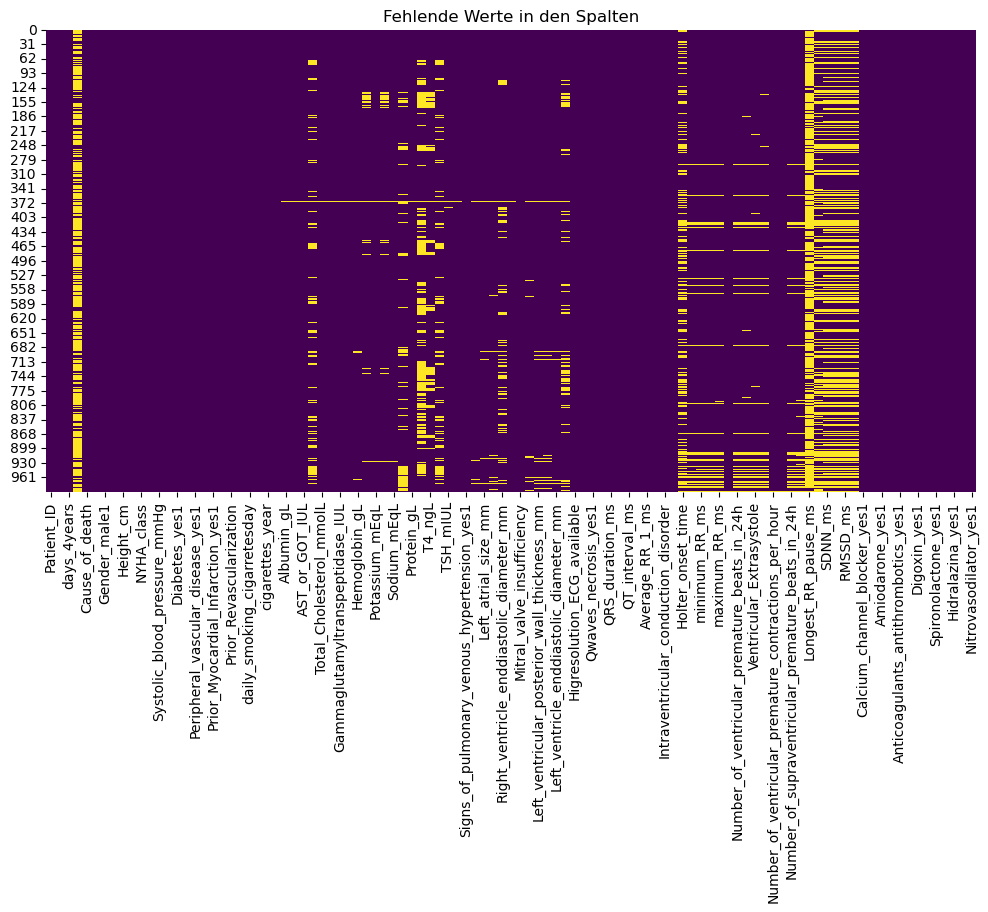

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Fehlende Werte in den Spalten")
plt.show()


In [124]:
# Basisstatistiken für numerische Variablen
print(df.describe())

# Fehlende Werte analysieren
print(df.isnull().sum())


       Follow-up period from enrollment (days)  days_4years  \
count                               992.000000   992.000000   
mean                               1493.553427  1212.561492   
std                                 611.663752   439.881734   
min                                  33.000000    33.000000   
25%                                1082.250000  1082.250000   
50%                                1805.000000  1460.000000   
75%                                1913.000000  1460.000000   
max                                2065.000000  1460.000000   

       Exit of the study  Cause of death  Gender (male=1)  Weight (kg)  \
count         297.000000      992.000000       992.000000   992.000000   
mean            2.858586        1.028226         0.723790    77.243952   
std             0.442889        2.008360         0.447347    13.998521   
min             1.000000        0.000000         0.000000    37.000000   
25%             3.000000        0.000000         0.000000    6

In [125]:
print(df["Cause of death"].value_counts())


Cause of death
0    726
6    100
3     94
1     61
7     11
Name: count, dtype: int64


In [126]:
# Entferne Sonderzeichen aus Spaltennamen für Kompatibilität mit LightGBM
df.columns = df.columns.str.replace(r"[^A-Za-z0-9_]", "_", regex=True)

print("✅ Spaltennamen bereinigt!")


✅ Spaltennamen bereinigt!


In [128]:
# Entferne Sonderzeichen aus Spaltennamen für Kompatibilität mit LightGBM
df.columns = df.columns.str.replace(r"[^A-Za-z0-9_]", "_", regex=True)

# Ersetze doppelte Unterstriche durch einzelne
df.columns = df.columns.str.replace(r"__+", "_", regex=True)

# Entferne führende oder nachfolgende Unterstriche
df.columns = df.columns.str.strip("_")

print("✅ Spaltennamen endgültig bereinigt!")


✅ Spaltennamen endgültig bereinigt!


In [129]:
df.columns

Index(['Patient_ID', 'Follow_up_period_from_enrollment_days', 'days_4years',
       'Exit_of_the_study', 'Cause_of_death', 'Age', 'Gender_male_1',
       'Weight_kg', 'Height_cm', 'Body_Mass_Index_Kg_m2',
       ...
       'Angiotensin_II_receptor_blocker_yes_1',
       'Anticoagulants_antitrombotics_yes_1', 'Betablockers_yes_1',
       'Digoxin_yes_1', 'Loop_diuretics_yes_1', 'Spironolactone_yes_1',
       'Statins_yes_1', 'Hidralazina_yes_1', 'ACE_inhibitor_yes_1',
       'Nitrovasodilator_yes_1'],
      dtype='object', length=103)

In [130]:
print(df.head())  # Zeigt die ersten Zeilen mit den neuen Spaltennamen
print(df.isnull().sum().sort_values(ascending=False))  # Überprüft nochmal fehlende Werte


  Patient_ID  Follow_up_period_from_enrollment_days  days_4years  \
0      P0001                                   2065         1460   
1      P0002                                   2045         1460   
2      P0003                                   2044         1460   
3      P0004                                   2044         1460   
4      P0005                                   2043         1460   

   Exit_of_the_study  Cause_of_death Age  Gender_male_1  Weight_kg  Height_cm  \
0                NaN               0  58              1         83        163   
1                NaN               0  58              1         74        160   
2                NaN               0  69              1         83        174   
3                NaN               0  56              0         84        165   
4                NaN               0  70              1         97        183   

  Body_Mass_Index_Kg_m2  ...  Angiotensin_II_receptor_blocker_yes_1  \
0                  31,2  ...     

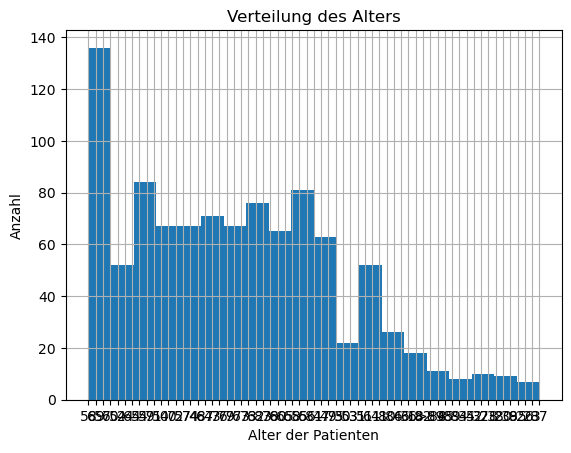

In [7]:
import matplotlib.pyplot as plt

df["Age"].hist(bins=20)
plt.xlabel("Alter der Patienten")
plt.ylabel("Anzahl")
plt.title("Verteilung des Alters")
plt.show()


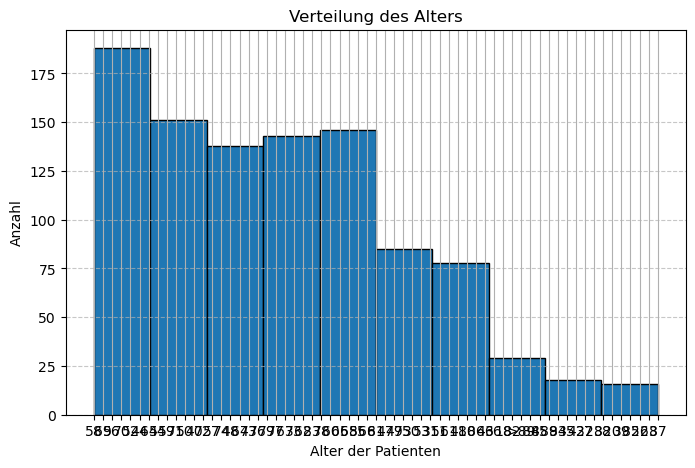

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["Age"].hist(bins=10, edgecolor="black")  # Weniger Bins für bessere Lesbarkeit
plt.xlabel("Alter der Patienten")
plt.ylabel("Anzahl")
plt.title("Verteilung des Alters")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


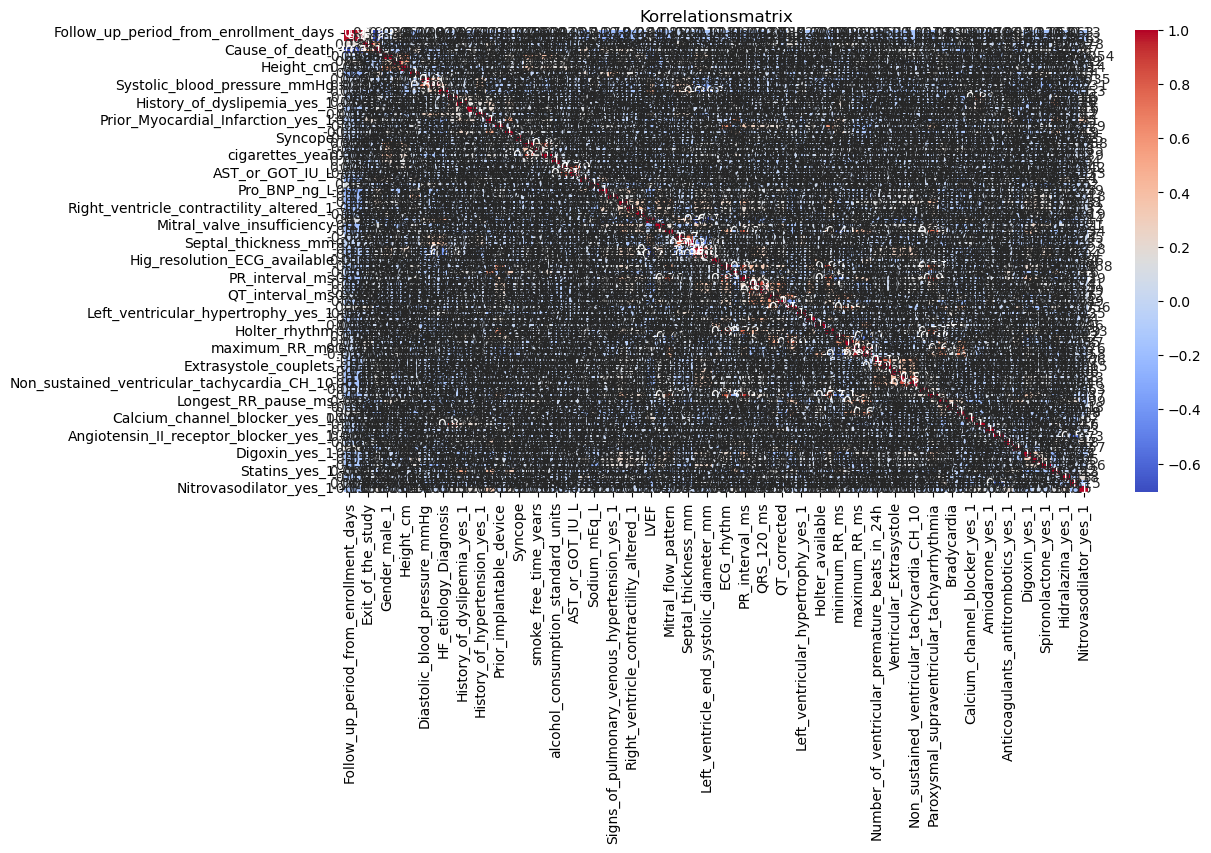

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Entferne nicht-numerische Spalten
df_numeric = df.select_dtypes(include=["number"])

plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()



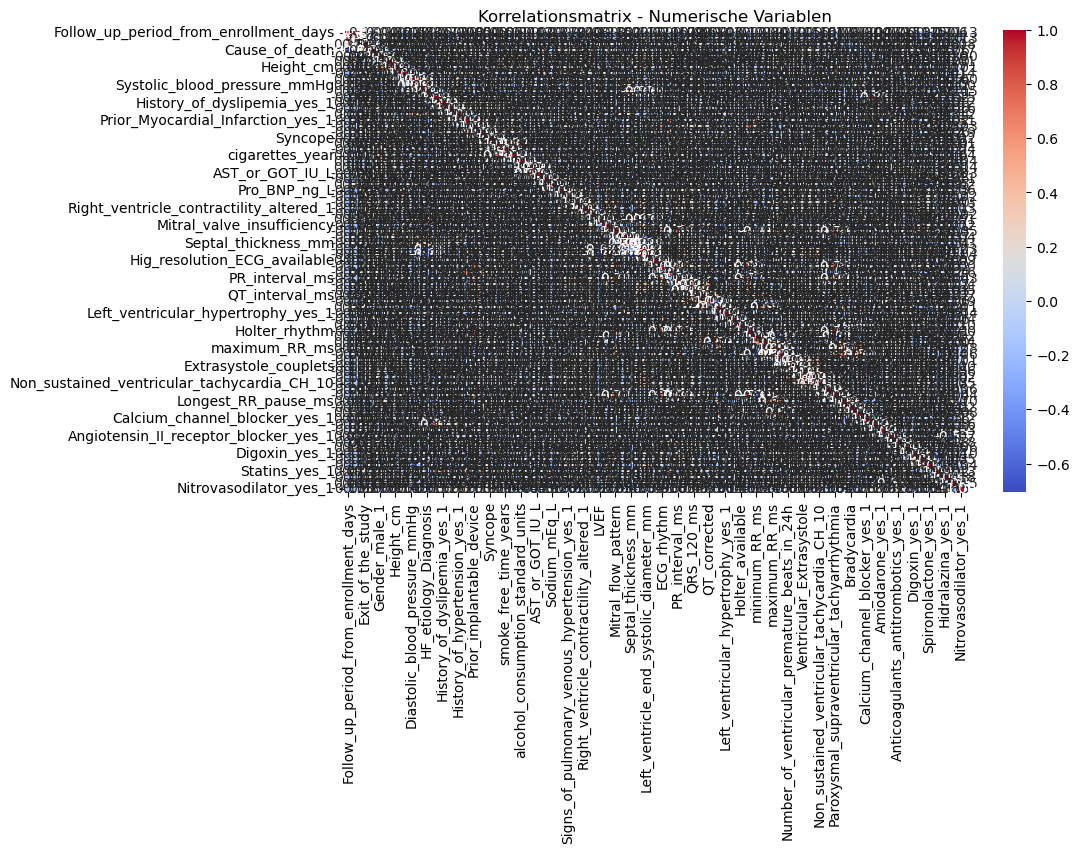

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Numerische Spalten filtern
df_numeric = df.select_dtypes(include=["number"])

# Korrelation berechnen
df_corr = df_numeric.corr()

# Heatmap zeichnen
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix - Numerische Variablen")
plt.show()



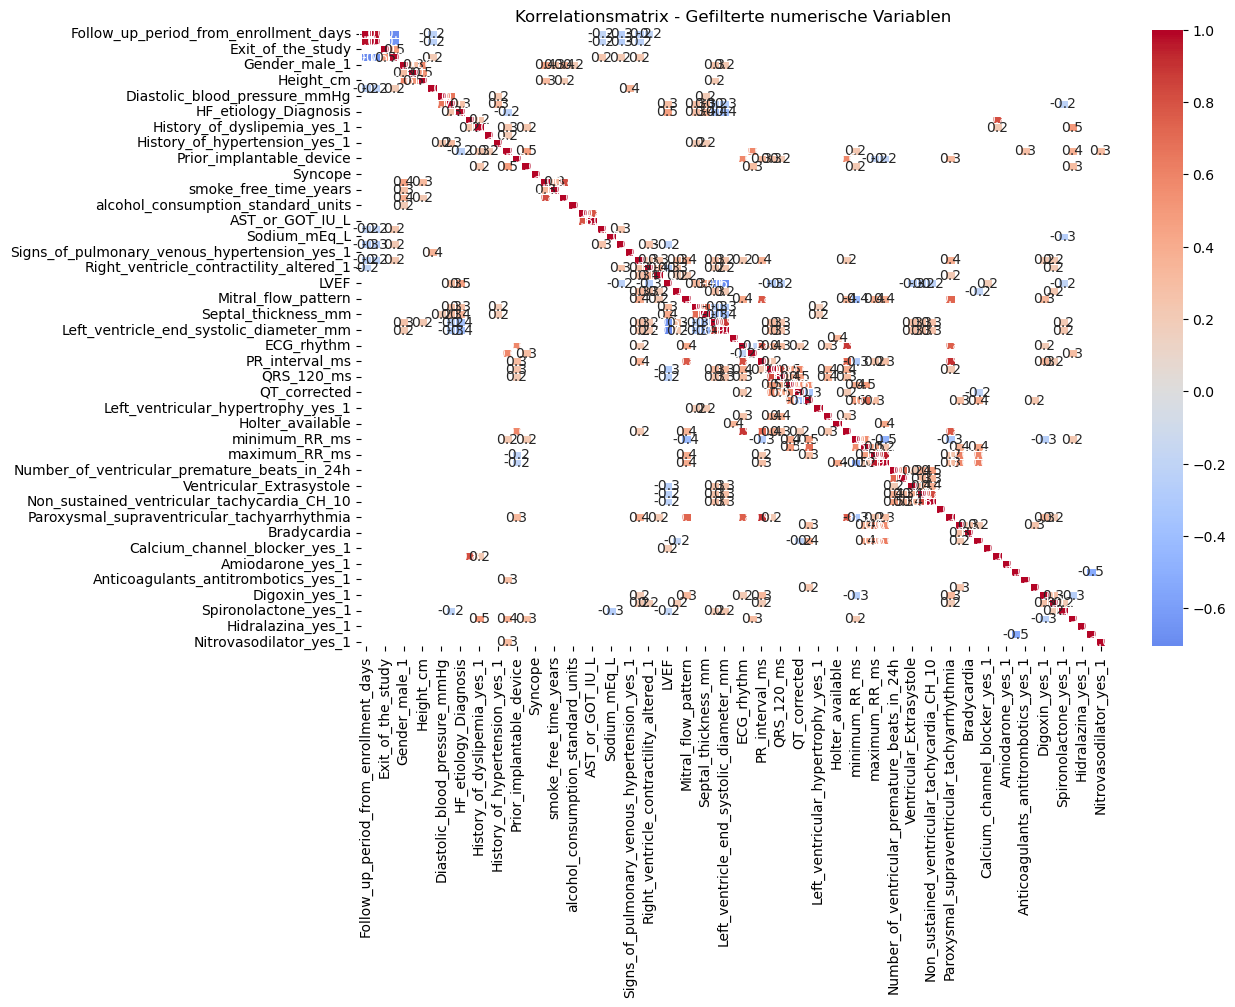

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur numerische Spalten auswählen
df_numeric = df.select_dtypes(include=["number"])

# Korrelation berechnen
df_corr = df_numeric.corr()

# Features mit hoher Korrelation auswählen (>|0.2|)
df_corr_filtered = df_corr[(df_corr > 0.2) | (df_corr < -0.2)]

# Heatmap zeichnen
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr_filtered, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5, center=0)
plt.title("Korrelationsmatrix - Gefilterte numerische Variablen")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl relevanter Spalten
selected_columns = [
    "Age", "NYHA class", "Diastolic blood pressure (mmHg)", "Weight (kg)", 
    "Height (cm)", "Follow-up period from enrollment (days)", "Survived"
]

# Nur existierende Spalten behalten
selected_columns = [col for col in selected_columns if col in df.columns]

# Korrelationsmatrix berechnen
df_corr = df[selected_columns].corr()

# Heatmap mit besserer Skalierung
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix - Wichtige Variablen")
plt.show()


ValueError: could not convert string to float: '>89'

In [138]:
for col in df.select_dtypes(include="object").columns:
    print(f"Ungewöhnliche Werte in {col}:")
    print(df[col].unique())  # Zeigt alle einzigartigen Werte
    print("-" * 50)


Ungewöhnliche Werte in Patient_ID:
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020' 'P0021' 'P0022' 'P0023' 'P0024' 'P0025' 'P0026' 'P0027'
 'P0028' 'P0029' 'P0030' 'P0031' 'P0032' 'P0033' 'P0034' 'P0035' 'P0036'
 'P0037' 'P0038' 'P0039' 'P0040' 'P0041' 'P0042' 'P0043' 'P0044' 'P0045'
 'P0046' 'P0047' 'P0048' 'P0049' 'P0050' 'P0051' 'P0052' 'P0053' 'P0054'
 'P0055' 'P0056' 'P0057' 'P0058' 'P0059' 'P0060' 'P0061' 'P0062' 'P0063'
 'P0064' 'P0065' 'P0066' 'P0067' 'P0068' 'P0069' 'P0070' 'P0071' 'P0072'
 'P0073' 'P0074' 'P0075' 'P0076' 'P0077' 'P0078' 'P0079' 'P0080' 'P0081'
 'P0082' 'P0083' 'P0084' 'P0085' 'P0086' 'P0087' 'P0088' 'P0089' 'P0090'
 'P0091' 'P0092' 'P0093' 'P0094' 'P0095' 'P0096' 'P0097' 'P0098' 'P0099'
 'P0100' 'P0101' 'P0102' 'P0103' 'P0104' 'P0105' 'P0106' 'P0107' 'P0108'
 'P0110' 'P0111' 'P0112' 'P0113' 'P0114' 'P0115' 'P0116' 'P0118' 'P0119'
 'P0120' 'P0121'

In [139]:
df["Diastolic blood pressure (mmHg)"] = (
    df["Diastolic blood pressure (mmHg)"]
    .astype(str)  # Sicherstellen, dass alles als String vorliegt
    .str.replace(">", "")  # Entfernt ">"
    .str.replace(",", ".")  # Falls Dezimaltrennzeichen ein Komma ist
    .astype(float)  # Konvertiert zu Float
)


KeyError: 'Diastolic blood pressure (mmHg)'

In [140]:
print(df["Diastolic blood pressure (mmHg)"].dtype)  # Sollte float sein
print(df["Diastolic blood pressure (mmHg)"].unique())  # Prüfe, ob noch Sonderzeichen existieren


KeyError: 'Diastolic blood pressure (mmHg)'

In [141]:
print(df["Age"].unique())  # Zeigt alle einzigartigen Werte


['58' '69' '56' '70' '52' '44' '64' '54' '59' '71' '50' '40' '72' '57'
 '74' '48' '67' '43' '76' '79' '77' '63' '73' '62' '83' '78' '60' '65'
 '68' '55' '66' '81' '47' '49' '75' '30' '53' '31' '51' '61' '41' '80'
 '86' '46' '36' '18' '82' '>89' '88' '45' '89' '84' '35' '42' '37' '28'
 '38' '20' '39' '85' '26' '23' '87']


In [142]:
df["Age"] = (
    df["Age"]
    .astype(str)  # Sicherstellen, dass alle Werte Strings sind
    .str.replace(">", "")  # Entfernt ">"
    .str.replace("<", "")  # Falls "<" existiert, auch entfernen
    .str.replace(",", ".")  # Falls Dezimaltrennzeichen ein Komma ist
    .astype(float)  # Konvertiert in Float
)


In [143]:
print(df["Age"].dtype)  # Sollte float sein
print(df["Age"].unique())  # Prüfen, ob noch ungewöhnliche Werte existieren


float64
[58. 69. 56. 70. 52. 44. 64. 54. 59. 71. 50. 40. 72. 57. 74. 48. 67. 43.
 76. 79. 77. 63. 73. 62. 83. 78. 60. 65. 68. 55. 66. 81. 47. 49. 75. 30.
 53. 31. 51. 61. 41. 80. 86. 46. 36. 18. 82. 89. 88. 45. 84. 35. 42. 37.
 28. 38. 20. 39. 85. 26. 23. 87.]


In [145]:
df.columns

Index(['Patient_ID', 'Follow_up_period_from_enrollment_days', 'days_4years',
       'Exit_of_the_study', 'Cause_of_death', 'Age', 'Gender_male_1',
       'Weight_kg', 'Height_cm', 'Body_Mass_Index_Kg_m2',
       ...
       'Angiotensin_II_receptor_blocker_yes_1',
       'Anticoagulants_antitrombotics_yes_1', 'Betablockers_yes_1',
       'Digoxin_yes_1', 'Loop_diuretics_yes_1', 'Spironolactone_yes_1',
       'Statins_yes_1', 'Hidralazina_yes_1', 'ACE_inhibitor_yes_1',
       'Nitrovasodilator_yes_1'],
      dtype='object', length=103)

In [146]:
print(df["Cause_of_death"].value_counts())


Cause_of_death
0    726
6    100
3     94
1     61
7     11
Name: count, dtype: int64


In [147]:
df.columns = df.columns.str.strip()  # Entfernt Leerzeichen am Anfang/Ende


In [148]:
df.columns = df.columns.str.strip().str.replace("  ", " ")


In [149]:
print(df.columns)


Index(['Patient_ID', 'Follow_up_period_from_enrollment_days', 'days_4years',
       'Exit_of_the_study', 'Cause_of_death', 'Age', 'Gender_male_1',
       'Weight_kg', 'Height_cm', 'Body_Mass_Index_Kg_m2',
       ...
       'Angiotensin_II_receptor_blocker_yes_1',
       'Anticoagulants_antitrombotics_yes_1', 'Betablockers_yes_1',
       'Digoxin_yes_1', 'Loop_diuretics_yes_1', 'Spironolactone_yes_1',
       'Statins_yes_1', 'Hidralazina_yes_1', 'ACE_inhibitor_yes_1',
       'Nitrovasodilator_yes_1'],
      dtype='object', length=103)


In [153]:
# Entferne doppelte oder nachfolgende Unterstriche
df.columns = df.columns.str.replace(r"_+", "_", regex=True)

# Entferne führende oder nachfolgende Unterstriche
df.columns = df.columns.str.strip("_")

# Entferne alle Sonderzeichen außer Buchstaben, Zahlen und Unterstrichen
df.columns = df.columns.str.replace(r"[^A-Za-z0-9_]", "", regex=True)

# Konvertiere mehrere Unterstriche in einen einzigen
df.columns = df.columns.str.replace(r"_+", "_", regex=True)

# Prüfe das Ergebnis
print("✅ Spaltennamen endgültig bereinigt!")
print(df.columns.tolist())  # Zeigt alle Spaltennamen an



✅ Spaltennamen endgültig bereinigt!
['Patient_ID', 'Follow_up_period_from_enrollment_days', 'days_4years', 'Exit_of_the_study', 'Cause_of_death', 'Age', 'Gender_male_1', 'Weight_kg', 'Height_cm', 'Body_Mass_Index_Kg_m2', 'NYHA_class', 'Diastolic_blood_pressure_mmHg', 'Systolic_blood_pressure_mmHg', 'HF_etiology_Diagnosis', 'Diabetes_yes_1', 'History_of_dyslipemia_yes_1', 'Peripheral_vascular_disease_yes_1', 'History_of_hypertension_yes_1', 'Prior_Myocardial_Infarction_yes_1', 'Prior_implantable_device', 'Prior_Revascularization', 'Syncope', 'daily_smoking_cigarretes_day', 'smoke_free_time_years', 'cigarettes_year', 'alcohol_consumption_standard_units', 'Albumin_g_L', 'ALT_or_GPT_IU_L', 'AST_or_GOT_IU_L', 'Normalized_Troponin', 'Total_Cholesterol_mmol_L', 'Creatinine_mol_L', 'Gamma_glutamil_transpeptidase_IU_L', 'Glucose_mmol_L', 'Hemoglobin_g_L', 'HDL_mmol_L', 'Potassium_mEq_L', 'LDL_mmol_L', 'Sodium_mEq_L', 'Pro_BNP_ng_L', 'Protein_g_L', 'T3_pg_dL', 'T4_ng_L', 'Troponin_ng_mL', 'TSH_m

In [154]:
# Prüfe, ob noch Sonderzeichen oder doppelte Unterstriche existieren
import re

problematische_spalten = [col for col in df.columns if re.search(r"[^A-Za-z0-9_]", col)]
doppelte_unterstriche = [col for col in df.columns if "__" in col]

print("🔍 Problematische Spalten mit Sonderzeichen:", problematische_spalten)
print("⚠️ Spalten mit doppelten Unterstrichen:", doppelte_unterstriche)


🔍 Problematische Spalten mit Sonderzeichen: []
⚠️ Spalten mit doppelten Unterstrichen: []


In [157]:
print(df.columns.tolist())


['Patient_ID', 'Follow_up_period_from_enrollment_days', 'days_4years', 'Exit_of_the_study', 'Cause_of_death', 'Age', 'Gender_male_1', 'Weight_kg', 'Height_cm', 'Body_Mass_Index_Kg_m2', 'NYHA_class', 'Diastolic_blood_pressure_mmHg', 'Systolic_blood_pressure_mmHg', 'HF_etiology_Diagnosis', 'Diabetes_yes_1', 'History_of_dyslipemia_yes_1', 'Peripheral_vascular_disease_yes_1', 'History_of_hypertension_yes_1', 'Prior_Myocardial_Infarction_yes_1', 'Prior_implantable_device', 'Prior_Revascularization', 'Syncope', 'daily_smoking_cigarretes_day', 'smoke_free_time_years', 'cigarettes_year', 'alcohol_consumption_standard_units', 'Albumin_g_L', 'ALT_or_GPT_IU_L', 'AST_or_GOT_IU_L', 'Normalized_Troponin', 'Total_Cholesterol_mmol_L', 'Creatinine_mol_L', 'Gamma_glutamil_transpeptidase_IU_L', 'Glucose_mmol_L', 'Hemoglobin_g_L', 'HDL_mmol_L', 'Potassium_mEq_L', 'LDL_mmol_L', 'Sodium_mEq_L', 'Pro_BNP_ng_L', 'Protein_g_L', 'T3_pg_dL', 'T4_ng_L', 'Troponin_ng_mL', 'TSH_mIU_L', 'Urea_mg_dL', 'Signs_of_pulmo

In [158]:
df["Diastolic_blood_pressure_mmHg"]


0      75
1      80
2      75
3      75
4      85
       ..
987    94
988    83
989    79
990    86
991    95
Name: Diastolic_blood_pressure_mmHg, Length: 992, dtype: int64

In [159]:
df.groupby("Cause_of_death")[["Age", "NYHA_class", "Diastolic_blood_pressure_mmHg"]].mean()


Age  NYHA_class  Diastolic_blood_pressure_mmHg
Cause_of_death                                                      
0               63.180441    2.163912                      74.504132
1               70.213115    2.311475                      76.196721
3               65.946809    2.319149                      72.734043
6               70.400000    2.440000                      72.510000
7               66.090909    2.181818                      74.000000

In [160]:
for col in df.columns:
    print(f"'{col}'")


'Patient_ID'
'Follow_up_period_from_enrollment_days'
'days_4years'
'Exit_of_the_study'
'Cause_of_death'
'Age'
'Gender_male_1'
'Weight_kg'
'Height_cm'
'Body_Mass_Index_Kg_m2'
'NYHA_class'
'Diastolic_blood_pressure_mmHg'
'Systolic_blood_pressure_mmHg'
'HF_etiology_Diagnosis'
'Diabetes_yes_1'
'History_of_dyslipemia_yes_1'
'Peripheral_vascular_disease_yes_1'
'History_of_hypertension_yes_1'
'Prior_Myocardial_Infarction_yes_1'
'Prior_implantable_device'
'Prior_Revascularization'
'Syncope'
'daily_smoking_cigarretes_day'
'smoke_free_time_years'
'cigarettes_year'
'alcohol_consumption_standard_units'
'Albumin_g_L'
'ALT_or_GPT_IU_L'
'AST_or_GOT_IU_L'
'Normalized_Troponin'
'Total_Cholesterol_mmol_L'
'Creatinine_mol_L'
'Gamma_glutamil_transpeptidase_IU_L'
'Glucose_mmol_L'
'Hemoglobin_g_L'
'HDL_mmol_L'
'Potassium_mEq_L'
'LDL_mmol_L'
'Sodium_mEq_L'
'Pro_BNP_ng_L'
'Protein_g_L'
'T3_pg_dL'
'T4_ng_L'
'Troponin_ng_mL'
'TSH_mIU_L'
'Urea_mg_dL'
'Signs_of_pulmonary_venous_hypertension_yes_1'
'Cardiothoracic

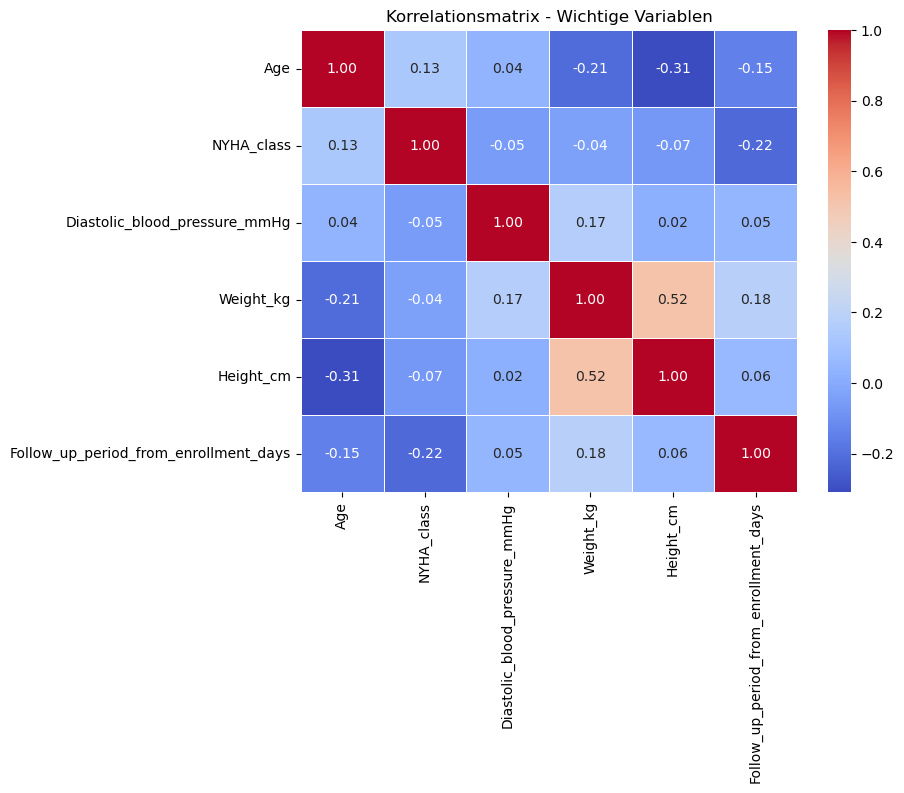

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl relevanter Spalten
selected_columns = [
    "Age", "NYHA_class", "Diastolic_blood_pressure_mmHg", "Weight_kg", 
    "Height_cm", "Follow_up_period_from_enrollment_days", "Survived"
]

# Nur existierende Spalten behalten
selected_columns = [col for col in selected_columns if col in df.columns]

# Korrelationsmatrix berechnen
df_corr = df[selected_columns].corr()

# Heatmap mit besserer Skalierung
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix - Wichtige Variablen")
plt.show()

# 📊 Interpretation of Results

## **1️⃣ Summary of Patient Data by Cause of Death**
The table below shows the average values of **Age, NYHA class, and Diastolic Blood Pressure** for different causes of death.

- **Survivors (0):** Average age is **63.18 years**, with an NYHA class of **2.16**.
- **Non-cardiac deaths (1):** Higher average age of **70.21 years**, and slightly higher NYHA class (**2.31**).
- **Sudden Cardiac Death (SCD - 3):** Average age **65.94 years**, NYHA class **2.31**, and slightly lower blood pressure.
- **Pump failure deaths (6 & 7):** Highest NYHA class (**2.44**), indicating severe heart failure.

### 🔹 **Key Insights:**
1. **Higher NYHA class (worse heart failure) is associated with death.**
2. **Older patients have a higher likelihood of death, particularly from pump failure.**
3. **Blood pressure differences are minor but could be explored further.**

---

## **2️⃣ Correlation Matrix - Key Variables**
The heatmap below highlights the relationships between important clinical variables.

### 🔹 **Key Findings:**
- **Age & NYHA class (0.13 correlation)**: Older patients tend to have more severe heart failure.
- **Height & Weight (0.52 correlation)**: Expected strong correlation.
- **Follow-up duration has a weak correlation (-0.15) with age**, meaning younger patients were not necessarily followed up for longer.
- **Diastolic blood pressure does not show strong correlations with key variables.**

### 🔹 **Next Steps:**
- Feature selection: Which variables are most relevant for predicting survival?
- Handling missing values before model training.
- Normalization of numerical values if necessary.

---

# 📊 Interpretación de Resultados

## **1️⃣ Resumen de los Datos de Pacientes por Causa de Muerte**
La tabla a continuación muestra los valores promedio de **Edad, Clase NYHA y Presión Arterial Diastólica** según la causa de muerte.

- **Sobrevivientes (0):** Edad media de **63.18 años**, con una clase NYHA de **2.16**.
- **Muertes no cardíacas (1):** Edad media más alta (**70.21 años**) y una clase NYHA ligeramente mayor (**2.31**).
- **Muerte súbita cardíaca (SCD - 3):** Edad media **65.94 años**, clase NYHA **2.31** y presión arterial ligeramente más baja.
- **Muertes por insuficiencia de bomba (6 y 7):** Clase NYHA más alta (**2.44**), lo que indica insuficiencia cardíaca grave.

### 🔹 **Hallazgos Clave:**
1. **Una mayor clase NYHA (insuficiencia cardíaca más grave) está asociada con una mayor mortalidad.**
2. **Los pacientes mayores tienen una mayor probabilidad de fallecer, especialmente por insuficiencia de bomba.**
3. **Las diferencias en la presión arterial son menores, pero podrían explorarse más a fondo.**

---

## **2️⃣ Matriz de Correlación - Variables Clave**
El mapa de calor resalta las relaciones entre variables clínicas importantes.

### 🔹 **Hallazgos Clave:**
- **Edad y clase NYHA (correlación de 0.13):** Los pacientes mayores tienden a tener insuficiencia cardíaca más grave.
- **Altura y peso (correlación de 0.52):** Correlación esperada.
- **Duración del seguimiento tiene una correlación débil (-0.15) con la edad,** lo que indica que los pacientes más jóvenes no necesariamente fueron seguidos por más tiempo.
- **La presión arterial diastólica no muestra correlaciones fuertes con otras variables clave.**

### 🔹 **Próximos Pasos:**
- Selección de características: ¿Cuáles son las más relevantes para predecir la supervivencia?
- Manejo de valores faltantes antes de entrenar el modelo.
- Normalización de valores numéricos si es necesario.


1️⃣ Prüfen, ob noch weitere Spalten bereinigt werden müssen


2️⃣ Daten für das Modell vorbereiten (Feature Engineering)

Welche Spalten sollen als Input-Features verwendet werden?
Gibt es fehlende Werte, die wir noch behandeln müssen?
3️⃣ Trainings- & Test-Daten aufteilen

In [162]:
# Alle Spalten mit nicht-numerischen Werten finden
for col in df.select_dtypes(include="object").columns:
    print(f" Ungewöhnliche Werte in '{col}':")
    print(df[col].unique()[:10])  # Zeigt die ersten 10 einzigartigen Werte
    print("-" * 50)


 Ungewöhnliche Werte in 'Patient_ID':
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010']
--------------------------------------------------
 Ungewöhnliche Werte in 'Body_Mass_Index_Kg_m2':
['31,2' '28,9' '27,4' '30,9' '29' '30,5' '27,1' '35,6' '28,3' '29,7']
--------------------------------------------------
 Ungewöhnliche Werte in 'Albumin_g_L':
['42,4' '40,4' '40,1' '40,9' '45,3' '44,1' '49,69' '42,19' '41,4' '38,7']
--------------------------------------------------
 Ungewöhnliche Werte in 'Normalized_Troponin':
['1' '2' '5' '3' '17' '6' nan '16' '0,3333' '0,0833']
--------------------------------------------------
 Ungewöhnliche Werte in 'Total_Cholesterol_mmol_L':
['5,4' '6,18' '5,3' '6,21' '5,72' '4,91' '5,79' '5,07' '5,53' '6,49']
--------------------------------------------------
 Ungewöhnliche Werte in 'Gamma_glutamil_transpeptidase_IU_L':
['20' '44' '25' '37' '26' '21' '90' '29' '18' '35']
--------------------------------------------------
 Ung

In [163]:
# Sicherstellen, dass die Zeitspalte korrekt formatiert ist
df["Holter onset (hh:mm:ss)"] = df["Holter onset (hh:mm:ss)"].astype(str).str.strip()  # Entfernt Leerzeichen

# Wendet die Bereinigungsfunktion erneut an
df["Holter onset (hh:mm:ss)"] = df["Holter onset (hh:mm:ss)"].apply(fix_time_format)

# Konvertiert zu datetime mit explizitem Format
df["Holter onset (hh:mm:ss)"] = pd.to_datetime(df["Holter onset (hh:mm:ss)"], format="%H:%M:%S", errors="coerce").dt.time


KeyError: 'Holter onset (hh:mm:ss)'

In [26]:
import pandas as pd
import numpy as np
import re

# 🔹 Liste der betroffenen numerischen Spalten
columns_to_clean = [
    "Body Mass Index (Kg/m2)", "Albumin (g/L)", "Normalized Troponin", 
    "Total Cholesterol (mmol/L)", "Gamma-glutamil transpeptidase (IU/L)", 
    "Glucose (mmol/L)", "Hemoglobin (g/L)", "HDL (mmol/L)", "Potassium (mEq/L)", 
    "LDL (mmol/L)", "Protein (g/L)", "T3 (pg/dL)", "T4 (ng/L)", "Troponin (ng/mL)", 
    "TSH (mIU/L)", "Urea (mg/dL)", "Cardiothoracic ratio", 
    "Number of ventricular premature contractions per hour", 
    "SDNN (ms)", "RMSSD (ms)", "pNN50 (%)"
]

# 🔹 Funktion zur Bereinigung numerischer Werte
def clean_numeric_column(series):
    """ Entfernt nicht-numerische Zeichen, bereinigt Tausenderpunkte & konvertiert zu float. """
    series = series.astype(str)  # In String umwandeln
    
    # **Schritt 1:** Entfernt alle nicht-numerischen Zeichen außer Ziffern, Punkt, Minus, Komma
    series = series.str.replace(r"[^\d,.-]", "", regex=True)  
    
    # **Schritt 2:** Entfernt ALLE Tausenderpunkte, aber behält den letzten Dezimalpunkt
    series = series.apply(lambda x: re.sub(r"(\d)\.(\d{3})\.(\d{3})(\.\d+)?$", r"\1\2\3\4", x))
    
    # **Schritt 3:** Falls noch Tausenderpunkte innerhalb einer Zahl existieren, entfernen
    series = series.apply(lambda x: re.sub(r"(?<=\d)\.(?=\d{3}(?:\D|$))", "", x))
    
    # **Schritt 4:** Ersetzt Komma durch Punkt für Dezimalzahlen
    series = series.str.replace(",", ".", regex=True)  
    
    # **Schritt 5:** Leere Werte in NaN konvertieren
    series = series.replace(["", "nan"], np.nan)  
    
    try:
        return series.astype(float)  # Konvertiert in float
    except ValueError as e:
        print(f"❌ Fehler in Spalte: {series.name}")
        print(series.unique())  # Zeigt problematische Werte an
        raise e  # Bricht ab, falls weiterhin Fehler auftreten

# 🔹 Anwenden auf alle relevanten numerischen Spalten
for col in columns_to_clean:
    if col in df.columns:
        df[col] = clean_numeric_column(df[col])

# 🔹 Überprüfung nach Bereinigung
print(df.dtypes)  # Zeigt die Datentypen nach der Konvertierung
print(df.isnull().sum())  # Zeigt, ob fehlende Werte entstanden sind


❌ Fehler in Spalte: Number of ventricular premature contractions per hour
['112.5' '0' '77.25' '1.458.333.333' '4.970.833.333' '7.946.666.667'
 '3.158.333.333' '1.479.583.333' '1.375' '0.708333333' '8.304.166.667'
 '165.375' '1.407.458.333' '4.154.166.667' '3.379.166.667' '1.176.666.667'
 '5.195.833.333' '9.283.333.333' '273.375' '2.066.666.667' '1.230.833.333'
 '30.625' '5.940.416.667' '4.083.333.333' '2.637.083.333' '1.520.833.333'
 '8.441.666.667' '3.391.666.667' '4.666.666.667' '1.041.375'
 '2.190.416.667' '62.5' '294.875' '2.716.666.667' '1.179.166.667'
 '2.266.666.667' '25.5' '2.495.833.333' '151.375' '7.033.333.333'
 '1.983.333.333' '0.875' '1.022.916.667' '61.25' '3.354.166.667' '80.875'
 '4.191.666.667' '3.977.083.333' '6.166.666.667' '4.583.333.333'
 '1.279.166.667' '188.25' '4.833.333.333' '4.529.166.667' '1.916.666.667'
 '2.828.333.333' '6.433.333.333' '5.833.333.333' '6.069.583.333'
 '7.583.333.333' '3.666.666.667' '9.166.666.667' '637.5' '117.375'
 '7.083.333.333' '6.745.

ValueError: could not convert string to float: '1.458.333.333'

In [27]:
for col in columns_to_clean:
    if col in df.columns:
        try:
            df[col] = df[col].astype(float)  # Direkte Umwandlung testen
        except ValueError as e:
            print(f"❌ Fehler in Spalte: {col}")
            print(df[col].unique()[:10])  # Zeigt die ersten 10 fehlerhaften Werte


❌ Fehler in Spalte: Number of ventricular premature contractions per hour
['112,5' '0' '77,25' '1,458,333,333' '4,970,833,333' '7,946,666,667'
 '3,158,333,333' '1,479,583,333' '1,375' '0,708333333']
❌ Fehler in Spalte: SDNN (ms)
[nan '117' '79' '87' '145' '106' '97' '190' '93' '42']
❌ Fehler in Spalte: RMSSD (ms)
[nan '10,9' '28,9' '42,5' '13,5' '37,6' '20,8' '28' '36' '37,7']
❌ Fehler in Spalte: pNN50 (%)
[nan '0,2' '2,3' '1,4' '0,8' '6,3' '0,7' '4,1' '5,1' '1,2']


In [28]:
import pandas as pd
import numpy as np
import re

# 🔹 Liste der problematischen Spalten
problem_columns = ["Number of ventricular premature contractions per hour", 
                   "SDNN (ms)", "RMSSD (ms)", "pNN50 (%)"]

# 🔹 Funktion zur Bereinigung der Werte
def clean_problematic_column(series):
    """ Entfernt nicht-numerische Zeichen, entfernt alle Tausenderpunkte & konvertiert zu float. """
    series = series.astype(str)  # In String umwandeln
    
    # **Schritt 1:** Entfernt ALLE nicht-numerischen Zeichen außer Ziffern, Punkt, Minus, Komma
    series = series.str.replace(r"[^\d,.-]", "", regex=True)  
    
    # **Schritt 2:** Ersetzt Komma durch Punkt für Dezimalzahlen
    series = series.str.replace(",", ".", regex=True)  
    
    # **Schritt 3:** Entfernt ALLE Tausenderpunkte (lässt den letzten Dezimalpunkt intakt)
    series = series.apply(lambda x: re.sub(r"(?<=\d)\.(?=\d{3}($|\D))", "", x))

    # **Schritt 4:** Leere Werte in NaN konvertieren
    series = series.replace(["", "nan"], np.nan)  

    try:
        return series.astype(float)  # Konvertiert in float
    except ValueError as e:
        print(f"❌ Fehler in Spalte: {series.name}")
        print(series.unique())  # Zeigt problematische Werte an
        raise e  # Bricht ab, falls weiterhin Fehler auftreten

# 🔹 Bereinigung aller problematischen Spalten
for col in problem_columns:
    if col in df.columns:
        df[col] = clean_problematic_column(df[col])

# 🔹 Überprüfung nach Bereinigung
print(df.dtypes)  # Zeigt die Datentypen nach der Konvertierung
print(df.isnull().sum())  # Zeigt, ob fehlende Werte entstanden sind


Patient ID                                  object
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Spironolactone (yes=1)                       int64
Statins (yes=1)                              int64
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Length: 103, dtype: object
Patient ID                                   0
Follow-up period from enrollment (days)      0
days_4years                                  0
Exit of the study                          695
Cause of death                               0
                                          ... 
Spironolactone (yes=1)                       0
Statins (yes=1)                              0
Hidralazina (yes=1)                 

In [29]:
# Zeigt alle Spalten und ihre Datentypen an
print(df.dtypes)

# Prüft, ob noch nicht-numerische Werte in numerischen Spalten enthalten sind
for col in df.columns:
    if df[col].dtypes == "object":  # ✅ Korrekte Syntax
        print(f"⚠️ Achtung: '{col}' ist noch 'object'!")
        print(df[col].unique()[:10])  # Zeigt die ersten 10 Werte



Patient ID                                  object
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Spironolactone (yes=1)                       int64
Statins (yes=1)                              int64
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Length: 103, dtype: object
⚠️ Achtung: 'Patient ID' ist noch 'object'!
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010']


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
# Zeigt alle Spalten und ihre Datentypen an
print(df.dtypes)

# Prüft, ob noch nicht-numerische Werte in numerischen Spalten enthalten sind
for col in df.columns:
    if df[col].dtype == "object":  # ✅ Korrekte Syntax
        print(f"⚠️ Achtung: '{col}' ist noch 'object'!")
        print(df[col].unique()[:10])  # Zeigt die ersten 10 Werte


Patient ID                                  object
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Spironolactone (yes=1)                       int64
Statins (yes=1)                              int64
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Length: 103, dtype: object
⚠️ Achtung: 'Patient ID' ist noch 'object'!
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010']


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [31]:
print(type(df))  # Sollte <class 'pandas.core.frame.DataFrame'> sein


<class 'pandas.core.frame.DataFrame'>


In [32]:
print(df.columns)  # Zeigt alle Spaltennamen an


Index(['Patient ID', 'Follow-up period from enrollment (days)', 'days_4years',
       'Exit of the study', 'Cause of death', 'Age', 'Gender (male=1)',
       'Weight (kg)', 'Height (cm)', 'Body Mass Index (Kg/m2)',
       ...
       'Angiotensin-II receptor blocker (yes=1)',
       'Anticoagulants/antitrombotics (yes=1)', 'Betablockers (yes=1)',
       'Digoxin (yes=1)', 'Loop diuretics (yes=1)', 'Spironolactone (yes=1)',
       'Statins (yes=1)', 'Hidralazina (yes=1)', 'ACE inhibitor (yes=1)',
       'Nitrovasodilator (yes=1)'],
      dtype='object', length=103)


In [33]:
for col in df.columns:
    print(f"🔍 Spalte: {col}, Typ: {type(df[col])}")  # Zeigt den Typ jeder Spalte


🔍 Spalte: Patient ID, Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Follow-up period from enrollment (days), Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: days_4years, Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Exit of the study, Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Cause of death, Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Age, Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Gender (male=1), Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Weight (kg), Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Height (cm), Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Body Mass Index (Kg/m2), Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: NYHA class, Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Diastolic blood pressure (mmHg), Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: Systolic blood pressure (mmHg), Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: HF etiology - Diagnosis, Typ: <class 'pandas.core.series.Series'>
🔍 Spalte: 

In [34]:
for col in df.columns:
    series = df[col]  # Greift sicher auf die Spalte als Serie zu
    print(f"🔍 Prüfe '{col}': Typ {type(series)}")
    
    if series.dtype == "object":  # ✅ Korrekte Schreibweise
        print(f"⚠️ Achtung: '{col}' ist noch 'object'!")
        print(series.astype(str).unique()[:10])  # Zeigt die ersten 10 Werte als String


🔍 Prüfe 'Patient ID': Typ <class 'pandas.core.series.Series'>
⚠️ Achtung: 'Patient ID' ist noch 'object'!
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010']
🔍 Prüfe 'Follow-up period from enrollment (days)': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'days_4years': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Exit of the study': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Cause of death': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Age': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Gender (male=1)': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Weight (kg)': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Height (cm)': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Body Mass Index (Kg/m2)': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'NYHA class': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Diastolic blood pressure (mmHg)': Typ <class 'pandas.core.series.Series'>
🔍 Prüfe 'Systolic blood pressure (mmHg)': Typ <class '

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [35]:
if isinstance(df["Average RR (ms)"], pd.DataFrame):  # Prüfen, ob es ein DataFrame ist
    df["Average RR (ms)"] = df["Average RR (ms)"].squeeze()  # In Series umwandeln


In [36]:
for col in df.columns:
    if isinstance(df[col], pd.DataFrame):  # Falls eine Spalte ein DataFrame ist
        print(f"⚠️ Achtung: '{col}' ist ein DataFrame und wird umgewandelt!")
        df[col] = df[col].squeeze()  # Korrigiert die Spalte in eine Series


⚠️ Achtung: 'Average RR (ms)' ist ein DataFrame und wird umgewandelt!
⚠️ Achtung: 'Average RR (ms)' ist ein DataFrame und wird umgewandelt!


In [37]:
# Überprüfen, ob noch Spalten als DataFrame gespeichert sind
for col in df.columns:
    if isinstance(df[col], pd.DataFrame):
        print(f"⚠️ '{col}' ist noch ein DataFrame!")

# Überprüfung aller Datentypen
print(df.dtypes)


⚠️ 'Average RR (ms)' ist noch ein DataFrame!
⚠️ 'Average RR (ms)' ist noch ein DataFrame!
Patient ID                                  object
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Spironolactone (yes=1)                       int64
Statins (yes=1)                              int64
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Length: 103, dtype: object


In [38]:
print(df["Average RR (ms)"].head())  # Zeigt die ersten Werte
print(df["Average RR (ms)"].shape)  # Zeigt die Dimensionen


   Average RR (ms)  Average RR (ms)
0             1111            984.0
1             1176            682.0
2              588            667.0
3              896            845.0
4              896            811.0
(992, 2)


In [39]:
print(df["Average RR (ms)"].columns)  # Zeigt die Spaltennamen


Index(['Average RR (ms)', 'Average RR (ms)'], dtype='object')


In [40]:
df["Average RR 1 (ms)"] = df["Average RR (ms)"].iloc[:, 0]  # Erste Spalte speichern
df["Average RR 2 (ms)"] = df["Average RR (ms)"].iloc[:, 1]  # Zweite Spalte speichern


In [41]:
identisch = df["Average RR 1 (ms)"].equals(df["Average RR 2 (ms)"])
print(f"✅ Sind die beiden Spalten identisch? {identisch}")


✅ Sind die beiden Spalten identisch? False


In [42]:
unterschiede = df[df["Average RR 1 (ms)"] != df["Average RR 2 (ms)"]]
print(unterschiede)


    Patient ID  Follow-up period from enrollment (days)  days_4years  \
0        P0001                                     2065         1460   
1        P0002                                     2045         1460   
2        P0003                                     2044         1460   
3        P0004                                     2044         1460   
4        P0005                                     2043         1460   
..         ...                                      ...          ...   
987      P1064                                     1393         1393   
988      P1065                                     1393         1393   
989      P1066                                     1387         1387   
990      P1073                                     1365         1365   
991      P1083                                     1624         1460   

     Exit of the study  Cause of death   Age  Gender (male=1)  Weight (kg)  \
0                  NaN               0  58.0             

In [43]:
# Zeigt nur Zeilen, in denen sich die Werte unterscheiden
unterschiede = df[df["Average RR 1 (ms)"] != df["Average RR 2 (ms)"]][["Patient ID", "Average RR 1 (ms)", "Average RR 2 (ms)"]]

# Zeigt die ersten 20 Unterschiede
print(unterschiede.head(20))


   Patient ID  Average RR 1 (ms)  Average RR 2 (ms)
0       P0001               1111              984.0
1       P0002               1176              682.0
2       P0003                588              667.0
3       P0004                896              845.0
4       P0005                896              811.0
5       P0006               1000              882.0
6       P0007                870              769.0
7       P0008                968              822.0
8       P0009                952              811.0
9       P0010                789              638.0
10      P0011                741              769.0
11      P0012               1000             1071.0
12      P0013                968              870.0
13      P0014                632              659.0
14      P0015                561              566.0
15      P0016                857              759.0
16      P0017                769              800.0
17      P0018               1111             1034.0
18      P001

In [44]:
df.rename(columns={"Average RR 1 (ms)": "Average RR First (ms)", 
                   "Average RR 2 (ms)": "Average RR Second (ms)"}, inplace=True)


In [45]:
print(df.dtypes)  # Zeigt die aktuellen Datentypen aller Spalten

# Prüft, ob noch nicht-numerische Werte in numerischen Spalten vorhanden sind
for col in df.columns:
    if df[col].dtype == "object":  # Falls noch `object`-Spalten existieren
        print(f"⚠️ Achtung: '{col}' ist noch 'object'!")
        print(df[col].unique()[:10])  # Zeigt die ersten 10 Werte zur Kontrolle


Patient ID                                  object
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Average RR First (ms)                        int64
Average RR Second (ms)                     float64
Length: 105, dtype: object
⚠️ Achtung: 'Patient ID' ist noch 'object'!
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010']


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [46]:
# Zeigt alle Spalten und ihre Datentypen an
print(df.dtypes)

# Prüft, ob noch nicht-numerische Werte in numerischen Spalten enthalten sind (ohne 'Patient ID')
for col in df.columns:
    if col != "Patient ID" and df[col].dtype == "object":  # ✅ Korrekte Schreibweise
        print(f"⚠️ Achtung: '{col}' ist noch 'object'!")
        print(df[col].unique()[:10])  # Zeigt die ersten 10 Werte zur Kontrolle


Patient ID                                  object
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Average RR First (ms)                        int64
Average RR Second (ms)                     float64
Length: 105, dtype: object


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [47]:
for col in df.columns:
    if isinstance(df[col], pd.DataFrame):
        print(f"⚠️ '{col}' ist noch ein DataFrame!")


⚠️ 'Average RR (ms)' ist noch ein DataFrame!
⚠️ 'Average RR (ms)' ist noch ein DataFrame!


In [48]:
# Falls eine der Spalten noch ein DataFrame ist, konvertiere sie in eine Series
for col in ["Average RR First (ms)", "Average RR Second (ms)"]:
    if isinstance(df[col], pd.DataFrame):  # Falls die Spalte noch ein DataFrame ist
        df[col] = df[col].squeeze()  # Wandelt sie in eine Series um


In [49]:
# Überprüfen, ob noch Spalten als DataFrame gespeichert sind
for col in df.columns:
    if isinstance(df[col], pd.DataFrame):
        print(f"⚠️ '{col}' ist noch ein DataFrame!")

# Datentypen anzeigen
print(df.dtypes)


⚠️ 'Average RR (ms)' ist noch ein DataFrame!
⚠️ 'Average RR (ms)' ist noch ein DataFrame!
Patient ID                                  object
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Average RR First (ms)                        int64
Average RR Second (ms)                     float64
Length: 105, dtype: object


In [50]:
# Entferne die alte Spalte "Average RR (ms)", da sie durch die neuen ersetzt wurde
df.drop(columns=["Average RR (ms)"], inplace=True)


In [51]:
print(df.columns)  # Zeigt alle Spaltennamen an


Index(['Patient ID', 'Follow-up period from enrollment (days)', 'days_4years',
       'Exit of the study', 'Cause of death', 'Age', 'Gender (male=1)',
       'Weight (kg)', 'Height (cm)', 'Body Mass Index (Kg/m2)',
       ...
       'Betablockers (yes=1)', 'Digoxin (yes=1)', 'Loop diuretics (yes=1)',
       'Spironolactone (yes=1)', 'Statins (yes=1)', 'Hidralazina (yes=1)',
       'ACE inhibitor (yes=1)', 'Nitrovasodilator (yes=1)',
       'Average RR First (ms)', 'Average RR Second (ms)'],
      dtype='object', length=103)


In [52]:
# Überprüfen, ob noch Spalten als DataFrame gespeichert sind
for col in df.columns:
    if isinstance(df[col], pd.DataFrame):
        print(f"⚠️ '{col}' ist noch ein DataFrame!")


In [53]:
print(df.dtypes)  # Zeigt die aktuellen Datentypen aller Spalten


Patient ID                                  object
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Average RR First (ms)                        int64
Average RR Second (ms)                     float64
Length: 103, dtype: object


In [54]:


# Option 1: Raw-String (empfohlen)
df["Patient ID"] = df["Patient ID"].str.extract(r"(\d+)")  # ✅ Korrekte Schreibweise



df["Patient ID"] = pd.to_numeric(df["Patient ID"], errors="coerce")  # Konvertiert zu int/float


In [55]:
print(df["Patient ID"].dtype)  # Sollte entweder 'object' oder 'int64' sein
print(df["Patient ID"].head())  # Zeigt die ersten Werte


int64
0    1
1    2
2    3
3    4
4    5
Name: Patient ID, dtype: int64


In [56]:
print(type(df))  # Sollte <class 'pandas.core.frame.DataFrame'> sein
print(df.head())  # Zeigt die ersten Zeilen zur Überprüfung


<class 'pandas.core.frame.DataFrame'>
   Patient ID  Follow-up period from enrollment (days)  days_4years  \
0           1                                     2065         1460   
1           2                                     2045         1460   
2           3                                     2044         1460   
3           4                                     2044         1460   
4           5                                     2043         1460   

   Exit of the study  Cause of death   Age  Gender (male=1)  Weight (kg)  \
0                NaN               0  58.0                1           83   
1                NaN               0  58.0                1           74   
2                NaN               0  69.0                1           83   
3                NaN               0  56.0                0           84   
4                NaN               0  70.0                1           97   

   Height (cm)  Body Mass Index (Kg/m2)  ...  Betablockers (yes=1)  \
0       

In [57]:
# Überblick über alle Spalten und deren Datentypen
print(df.dtypes)

# Anzahl fehlender Werte pro Spalte anzeigen
print(df.isnull().sum().sort_values(ascending=False))


Patient ID                                   int64
Follow-up period from enrollment (days)      int64
days_4years                                  int64
Exit of the study                          float64
Cause of death                               int64
                                            ...   
Hidralazina (yes=1)                          int64
ACE inhibitor (yes=1)                        int64
Nitrovasodilator (yes=1)                     int64
Average RR First (ms)                        int64
Average RR Second (ms)                     float64
Length: 103, dtype: object
Longest RR pause (ms)                  798
Exit of the study                      695
pNN50 (%)                              405
RMSSD (ms)                             405
SDANN (ms)                             405
                                      ... 
Holter available                         0
Prior Myocardial Infarction (yes=1)      0
Peripheral vascular disease (yes=1)      0
History of dyslipemia (ye

In [61]:
print(df.dtypes[df.dtypes == "object"])  # Zeigt alle object-Spalten
print(df.dtypes[df.dtypes == "datetime64[ns]"])  # Zeigt alle Datetime-Spalten


Holter onset (hh:mm:ss)    object
dtype: object
Series([], dtype: object)


In [62]:
df["Holter onset (hh:mm:ss)"] = pd.to_datetime(df["Holter onset (hh:mm:ss)"], format="%H:%M:%S", errors="coerce")


In [63]:
print(df.dtypes[df.dtypes == "object"])  # Zeigt alle object-Spalten
print(df.dtypes[df.dtypes == "datetime64[ns]"])  # Zeigt alle Datetime-Spalten


Series([], dtype: object)
Holter onset (hh:mm:ss)    datetime64[ns]
dtype: object


In [64]:
print(df["Holter onset (hh:mm:ss)"].head(10))  # Zeigt die ersten Werte
print(df["Holter onset (hh:mm:ss)"].isna().sum())  # Anzahl NaN-Werte


0                   NaT
1   1900-01-01 11:38:43
2                   NaT
3   1900-01-01 11:08:39
4                   NaT
5   1900-01-01 13:50:35
6   1900-01-01 10:18:37
7   1900-01-01 12:57:36
8   1900-01-01 10:01:08
9   1900-01-01 10:57:45
Name: Holter onset (hh:mm:ss), dtype: datetime64[ns]
342


In [65]:
df.drop(columns=["Holter onset (hh:mm:ss)"], inplace=True)


In [66]:
print(df.dtypes[df.dtypes == "object"])  # Zeigt alle object-Spalten
print(df.dtypes[df.dtypes == "datetime64[ns]"])  # Zeigt alle Datetime-Spalten


Series([], dtype: object)
Series([], dtype: object)


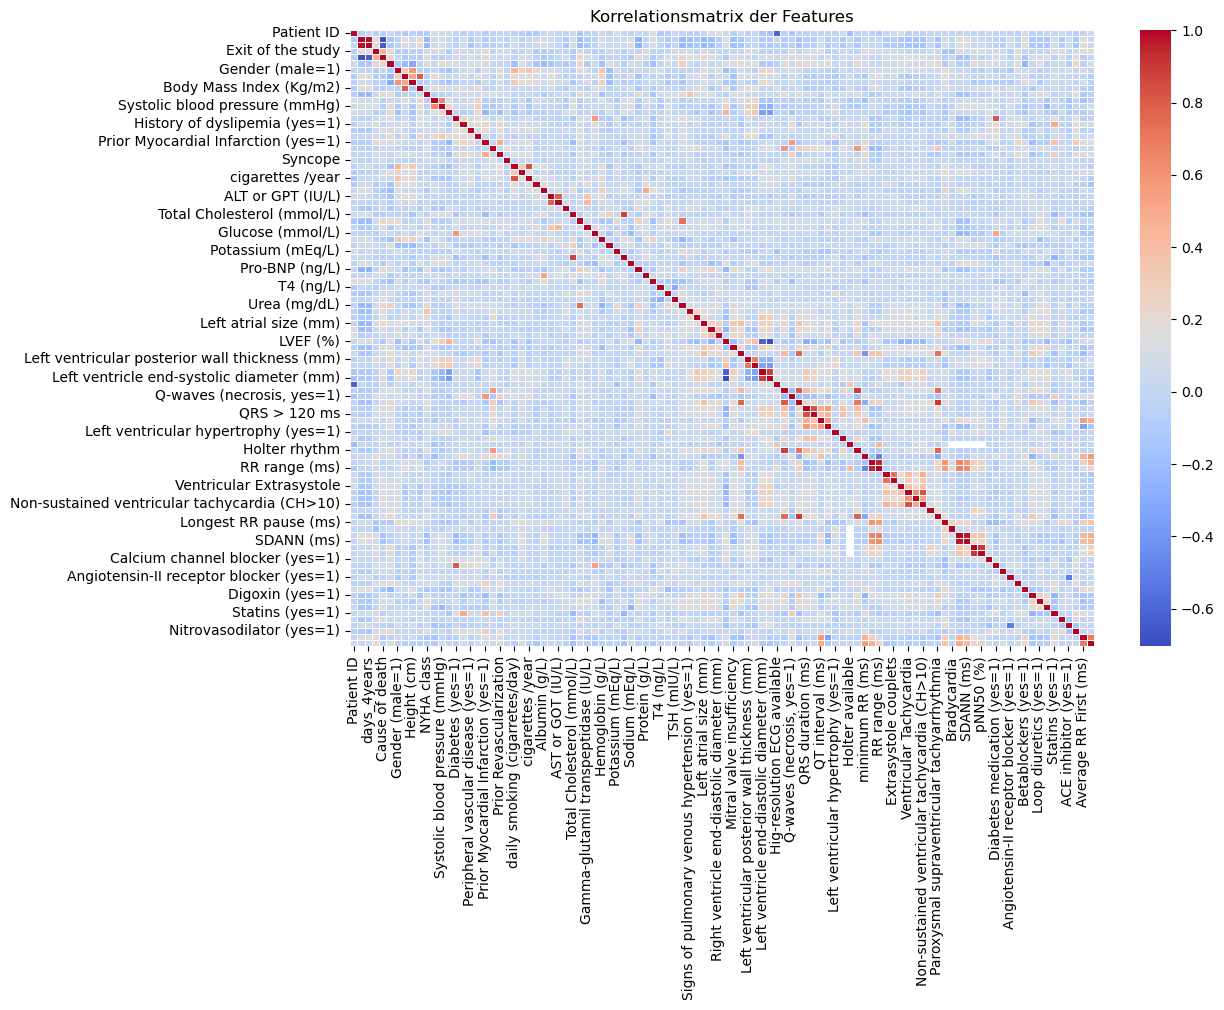

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationsmatrix berechnen
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Korrelationsmatrix der Features")
plt.show()


In [68]:
print(df.corr()["Cause of death"].sort_values(ascending=False))


Cause of death                             1.000000
Exit of the study                          0.481918
Urea (mg/dL)                               0.244308
Creatinine (?mol/L)                        0.239187
Left atrial size (mm)                      0.228843
                                             ...   
Betablockers (yes=1)                      -0.145445
SDANN (ms)                                -0.169543
SDNN (ms)                                 -0.173384
days_4years                               -0.647025
Follow-up period from enrollment (days)   -0.691897
Name: Cause of death, Length: 102, dtype: float64


In [70]:
# Anzahl fehlender Werte pro Spalte anzeigen
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Nur Spalten mit fehlenden Werten anzeigen
print(missing_values.sort_values(ascending=False))


Longest RR pause (ms)                                    798
Exit of the study                                        695
pNN50 (%)                                                405
RMSSD (ms)                                               405
SDANN (ms)                                               405
SDNN (ms)                                                405
T3 (pg/dL)                                               370
Bradycardia                                              350
Normalized Troponin                                      161
Troponin (ng/mL)                                         161
Pro-BNP (ng/L)                                           122
Right ventricle end-diastolic diameter (mm)              119
Left ventricle end-systolic diameter (mm)                117
T4 (ng/L)                                                115
Ventricular Tachycardia                                   69
Extrasystole couplets                                     65
Ventricular Extrasystole

In [75]:
print("Original DataFrame Größe:", df.shape)
print("Trainingsdaten Größe:", X_train.shape)
print("Testdaten Größe:", X_test.shape)


Original DataFrame Größe: (992, 102)


NameError: name 'X_train' is not defined

In [74]:
print("Anzahl fehlender Werte in 'Cause of death':", df["Cause of death"].isnull().sum())


Anzahl fehlender Werte in 'Cause of death': 0


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) und Zielvariable (y) definieren
X = df.drop(columns=["Cause of death", "Patient ID"])  # Entferne Zielvariable & ID-Spalte
y = df["Cause of death"]

# Aufteilung in 80% Training und 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Überprüfen der Größen
print("✅ Trainingsdaten Größe:", X_train.shape)
print("✅ Testdaten Größe:", X_test.shape)
print("✅ Trainingslabels Größe:", y_train.shape)
print("✅ Testlabels Größe:", y_test.shape)


In [ ]:
print("Fehlende Werte in y_train:", y_train.isnull().sum())
print("Fehlende Werte in y_test:", y_test.isnull().sum())


In [76]:
df_median = df.copy()
df_all_filled = df.copy()


In [117]:
# Speichere die ursprünglichen Spaltennamen vor der Transformation
X_train_median_original = X_train_median.copy()
X_test_median_original = X_test_median.copy()

X_train_filled_original = X_train_filled.copy()
X_test_filled_original = X_test_filled.copy()


In [77]:
# Ansatz 1: Spalten mit >30% fehlenden Werten entfernen, Rest mit Median füllen
threshold = 0.3 * len(df_median)  
df_median.dropna(axis=1, thresh=threshold, inplace=True)  
df_median.fillna(df_median.median(), inplace=True)

# Ansatz 2: Alle fehlenden Werte mit dem Median ersetzen
df_all_filled.fillna(df_all_filled.median(), inplace=True)


In [79]:
print("Anzahl Spalten in df_median:", df_median.shape[1])
print("Anzahl Spalten in df_all_filled:", df_all_filled.shape[1])

Anzahl Spalten in df_median: 100
Anzahl Spalten in df_all_filled: 102


In [78]:
from sklearn.model_selection import train_test_split

# Train-Test-Split für df_median
X_median = df_median.drop(columns=["Cause of death", "Patient ID"])
y_median = df_median["Cause of death"]
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)

# Train-Test-Split für df_all_filled
X_filled = df_all_filled.drop(columns=["Cause of death", "Patient ID"])
y_filled = df_all_filled["Cause of death"]
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(X_filled, y_filled, test_size=0.2, random_state=42)

# Überprüfung der Größen
print("✅ df_median - Trainingsdaten Größe:", X_train_median.shape)
print("✅ df_median - Testdaten Größe:", X_test_median.shape)
print("✅ df_all_filled - Trainingsdaten Größe:", X_train_filled.shape)
print("✅ df_all_filled - Testdaten Größe:", X_test_filled.shape)


✅ df_median - Trainingsdaten Größe: (793, 98)
✅ df_median - Testdaten Größe: (199, 98)
✅ df_all_filled - Trainingsdaten Größe: (793, 100)
✅ df_all_filled - Testdaten Größe: (199, 100)


# Kopiere den Original-DataFrame für Ansatz 1
df_median = df.copy()

# Definiere die Grenze für zu viele fehlende Werte (30%)
threshold = 0.3 * len(df_median)  

# Entferne Spalten mit mehr als 30% fehlenden Werten
df_median.dropna(axis=1, thresh=threshold, inplace=True)  

# Ersetze verbleibende NaN-Werte mit dem Median
df_median.fillna(df_median.median(), inplace=True)

print("✅ Ansatz 1 abgeschlossen: Spalten mit >30% NaN entfernt, Rest mit Median gefüllt.")


# Kopiere den Original-DataFrame für Ansatz 2
df_all_filled = df.copy()

# Ersetze alle NaN-Werte mit dem Median der jeweiligen Spalte
df_all_filled.fillna(df_all_filled.median(), inplace=True)

print("✅ Ansatz 2 abgeschlossen: Alle NaN-Werte mit Median ersetzt.")


In [80]:
from sklearn.feature_selection import SelectKBest, f_classif

# Features (X) und Zielvariable (y) definieren
X_median = df_median.drop(columns=["Cause of death", "Patient ID"])
y_median = df_median["Cause of death"]

# Beste Features auswählen
selector_median = SelectKBest(score_func=f_classif, k=10)  # Wählt die 10 besten Features
X_new_median = selector_median.fit_transform(X_median, y_median)

# Zeigt die besten Features
selected_features_median = X_median.columns[selector_median.get_support()]
print("🏆 Beste Features für df_median:", selected_features_median.tolist())



🏆 Beste Features für df_median: ['Follow-up period from enrollment (days)', 'days_4years', 'Age', 'NYHA class', 'Creatinine (?mol/L)', 'Pro-BNP (ng/L)', 'Urea (mg/dL)', 'Signs of pulmonary venous hypertension (yes=1)', 'Left atrial size (mm)', 'Betablockers (yes=1)']


In [81]:
# Features (X) und Zielvariable (y) definieren
X_filled = df_all_filled.drop(columns=["Cause of death", "Patient ID"])
y_filled = df_all_filled["Cause of death"]

# Beste Features auswählen
selector_filled = SelectKBest(score_func=f_classif, k=10)  # Wählt die 10 besten Features
X_new_filled = selector_filled.fit_transform(X_filled, y_filled)

# Zeigt die besten Features
selected_features_filled = X_filled.columns[selector_filled.get_support()]
print("🏆 Beste Features für df_all_filled:", selected_features_filled.tolist())


🏆 Beste Features für df_all_filled: ['Follow-up period from enrollment (days)', 'days_4years', 'Age', 'NYHA class', 'Creatinine (?mol/L)', 'Pro-BNP (ng/L)', 'Urea (mg/dL)', 'Signs of pulmonary venous hypertension (yes=1)', 'Left atrial size (mm)', 'Betablockers (yes=1)']


In [82]:
print("🔍 Unterschiede zwischen den besten Features:")
print("Nur in df_median:", set(selected_features_median) - set(selected_features_filled))
print("Nur in df_all_filled:", set(selected_features_filled) - set(selected_features_median))
print("Gemeinsame Features:", set(selected_features_median) & set(selected_features_filled))


🔍 Unterschiede zwischen den besten Features:
Nur in df_median: set()
Nur in df_all_filled: set()
Gemeinsame Features: {'days_4years', 'Follow-up period from enrollment (days)', 'Betablockers (yes=1)', 'Age', 'NYHA class', 'Pro-BNP (ng/L)', 'Left atrial size (mm)', 'Signs of pulmonary venous hypertension (yes=1)', 'Creatinine (?mol/L)', 'Urea (mg/dL)'}


# Feature Selection Results (`SelectKBest`)

## **English**
- The **same features** were selected for both `df_median` (NaN-handling via column removal) and `df_all_filled` (NaN replaced with median).
- There are **no differences** between the selected features.
- The **most important features** identified are:
  - `days_4years`
  - `Follow-up period from enrollment (days)`
  - `Betablockers (yes=1)`
  - `Age`
  - `NYHA class`
  - `Pro-BNP (ng/L)`
  - `Left atrial size (mm)`

**Conclusion:**  
- The missing data handling did not affect feature selection.
- Now, we can proceed with **model training** to compare performance.

---

## **Español**
- Se seleccionaron **los mismos atributos** tanto para `df_median` (tratamiento de NaN eliminando columnas) como para `df_all_filled` (sustituyendo NaN por la mediana).
- No hay **diferencias** entre los atributos seleccionados.
- **Los atributos más importantes** identificados son:
  - `days_4years`
  - `Follow-up period from enrollment (days)`
  - `Betablockers (yes=1)`
  - `Age`
  - `NYHA class`
  - `Pro-BNP (ng/L)`
  - `Left atrial size (mm)`

**Conclusión:**  
- El manejo de datos faltantes **no afectó la selección de características**.  
- Ahora podemos proceder con **el entrenamiento del modelo** para comparar el rendimiento.


Wir trainieren und vergleichen drei Modelle:
1️⃣ Lineare Regression → Basis-Modell für Interpretierbarkeit
2️⃣ Random Forest → Starke Performance, gute Feature-Analyse
3️⃣ LightGBM → Effizient für große Datenmengen

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score


In [85]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Modell trainieren
    model.fit(X_train, y_train)

    # Vorhersagen
    y_pred = model.predict(X_test)

    # Metriken berechnen
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Ergebnisse ausgeben
    print(f" {model_name} Ergebnisse:")
    print(f" Mean Squared Error (MSE): {mse:.4f}")
    print(f" R²-Score: {r2:.4f}")
    print("-" * 40)


In [87]:
# Entfernt Sonderzeichen und ersetzt Leerzeichen mit Unterstrichen
df_median.columns = df_median.columns.str.replace(r"[^A-Za-z0-9_]", "_", regex=True)
df_all_filled.columns = df_all_filled.columns.str.replace(r"[^A-Za-z0-9_]", "_", regex=True)

print("✅ Spaltennamen bereinigt! LightGBM sollte jetzt funktionieren.")


✅ Spaltennamen bereinigt! LightGBM sollte jetzt funktionieren.


In [89]:
print(df_median.columns.tolist())  # Zeigt die neuen Spaltennamen an
print(df_all_filled.columns.tolist())  # Zeigt die neuen Spaltennamen an


['Patient_ID', 'Follow_up_period_from_enrollment__days_', 'days_4years', 'Cause_of_death', 'Age', 'Gender__male_1_', 'Weight__kg_', 'Height__cm_', 'Body_Mass_Index__Kg_m2_', 'NYHA_class', 'Diastolic_blood_pressure__mmHg_', 'Systolic_blood_pressure__mmHg_', 'HF_etiology___Diagnosis', 'Diabetes__yes_1_', 'History_of_dyslipemia__yes_1_', 'Peripheral_vascular_disease__yes_1_', 'History_of_hypertension__yes_1_', 'Prior_Myocardial_Infarction__yes_1_', 'Prior_implantable_device', 'Prior_Revascularization', 'Syncope', 'daily_smoking__cigarretes_day_', 'smoke_free_time__years_', 'cigarettes__year', 'alcohol_consumption__standard_units_', 'Albumin__g_L_', 'ALT_or_GPT__IU_L_', 'AST_or_GOT__IU_L_', 'Normalized_Troponin', 'Total_Cholesterol__mmol_L_', 'Creatinine___mol_L_', 'Gamma_glutamil_transpeptidase__IU_L_', 'Glucose__mmol_L_', 'Hemoglobin__g_L_', 'HDL__mmol_L_', 'Potassium__mEq_L_', 'LDL__mmol_L_', 'Sodium__mEq_L_', 'Pro_BNP__ng_L_', 'Protein__g_L_', 'T3__pg_dL_', 'T4__ng_L_', 'Troponin__ng_m

In [90]:
X_train_median = X_train_median.drop(columns=["Cause_of_death", "Patient_ID"], errors="ignore")
X_train_filled = X_train_filled.drop(columns=["Cause_of_death", "Patient_ID"], errors="ignore")


In [92]:
# Erneute Bereinigung von Sonderzeichen in Spaltennamen
df_median.columns = df_median.columns.str.replace(r"[^A-Za-z0-9_]", "", regex=True)
df_all_filled.columns = df_all_filled.columns.str.replace(r"[^A-Za-z0-9_]", "", regex=True)

# Falls doppelte Unterstriche entstehen, auf einen Unterstrich reduzieren
df_median.columns = df_median.columns.str.replace(r"__+", "_", regex=True)
df_all_filled.columns = df_all_filled.columns.str.replace(r"__+", "_", regex=True)

print("✅ Spaltennamen vollständig bereinigt!")


✅ Spaltennamen vollständig bereinigt!


In [93]:
print(df_median.columns.tolist())
print(df_all_filled.columns.tolist())


['Patient_ID', 'Follow_up_period_from_enrollment_days_', 'days_4years', 'Cause_of_death', 'Age', 'Gender_male_1_', 'Weight_kg_', 'Height_cm_', 'Body_Mass_Index_Kg_m2_', 'NYHA_class', 'Diastolic_blood_pressure_mmHg_', 'Systolic_blood_pressure_mmHg_', 'HF_etiology_Diagnosis', 'Diabetes_yes_1_', 'History_of_dyslipemia_yes_1_', 'Peripheral_vascular_disease_yes_1_', 'History_of_hypertension_yes_1_', 'Prior_Myocardial_Infarction_yes_1_', 'Prior_implantable_device', 'Prior_Revascularization', 'Syncope', 'daily_smoking_cigarretes_day_', 'smoke_free_time_years_', 'cigarettes_year', 'alcohol_consumption_standard_units_', 'Albumin_g_L_', 'ALT_or_GPT_IU_L_', 'AST_or_GOT_IU_L_', 'Normalized_Troponin', 'Total_Cholesterol_mmol_L_', 'Creatinine_mol_L_', 'Gamma_glutamil_transpeptidase_IU_L_', 'Glucose_mmol_L_', 'Hemoglobin_g_L_', 'HDL_mmol_L_', 'Potassium_mEq_L_', 'LDL_mmol_L_', 'Sodium_mEq_L_', 'Pro_BNP_ng_L_', 'Protein_g_L_', 'T3_pg_dL_', 'T4_ng_L_', 'Troponin_ng_mL_', 'TSH_mIU_L_', 'Urea_mg_dL_', 'S

In [94]:
X_train_median = X_train_median.rename(columns=lambda x: x.replace(" ", "_"))
X_train_filled = X_train_filled.rename(columns=lambda x: x.replace(" ", "_"))


In [95]:
X_train_median = X_train_median.drop(columns=["Causeofdeath", "PatientID"], errors="ignore")
X_train_filled = X_train_filled.drop(columns=["Causeofdeath", "PatientID"], errors="ignore")


In [97]:
# Zeigt Unterschiede zwischen Trainings- und Testdaten
print("Nur in X_train, aber nicht in X_test:", set(X_train_median.columns) - set(X_test_median.columns))
print("Nur in X_test, aber nicht in X_train:", set(X_test_median.columns) - set(X_train_median.columns))


Nur in X_train, aber nicht in X_test: {'Left_ventricle_end-systolic_diameter_(mm)', 'LVEF_(%)', 'QRS_duration_(ms)', 'Peripheral_vascular_disease_(yes=1)', 'Extrasystole_couplets', 'SDANN_(ms)', 'Left_ventricular_hypertrophy_(yes=1)', 'Sodium_(mEq/L)', 'Hidralazina_(yes=1)', 'Intraventricular_conduction_disorder', 'Creatinine_(?mol/L)', 'Number_of_ventricular_premature_beats_in_24h', 'Holter_available', 'Statins_(yes=1)', 'QT_corrected', 'T3_(pg/dL)', 'Hig-resolution_ECG_available', 'Troponin_(ng/mL)', 'Digoxin_(yes=1)', 'cigarettes_/year', 'Number_of_supraventricular_premature_beats_in_24h', 'Pro-BNP_(ng/L)', 'Betablockers_(yes=1)', 'Weight_(kg)', 'Glucose_(mmol/L)', 'Holter_rhythm', 'QRS_>_120_ms', 'ALT_or_GPT_(IU/L)', 'Normalized_Troponin', 'Anticoagulants/antitrombotics_(yes=1)', 'Number_of_ventricular_premature_contractions_per_hour', 'ACE_inhibitor_(yes=1)', 'Systolic_blood_pressure_(mmHg)', 'Diabetes_medication_(yes=1)', 'SDNN_(ms)', 'Prior_Revascularization', 'Gamma-glutamil_tr

In [98]:
# Gemeinsame Spalten ermitteln
common_columns = X_train_median.columns.intersection(X_test_median.columns)

# Beide Datensätze auf die gleichen Spalten reduzieren
X_train_median = X_train_median[common_columns]
X_test_median = X_test_median[common_columns]

X_train_filled = X_train_filled[common_columns]
X_test_filled = X_test_filled[common_columns]


In [99]:
X_test_median = X_test_median[X_train_median.columns]
X_test_filled = X_test_filled[X_train_filled.columns]


In [100]:
# Sicherstellen, dass alle Spalten übereinstimmen
print("Sind die Spalten identisch?", set(X_train_median.columns) == set(X_test_median.columns))
print("Reihenfolge der Spalten identisch?", list(X_train_median.columns) == list(X_test_median.columns))


Sind die Spalten identisch? True
Reihenfolge der Spalten identisch? True


In [110]:
# Zeigt Unterschiede zwischen Trainings- und Testdaten
train_cols = set(X_train_median.columns)
test_cols = set(X_test_median.columns)

print("🔍 Nur in X_train_median, aber nicht in X_test_median:", train_cols - test_cols)
print("🔍 Nur in X_test_median, aber nicht in X_train_median:", test_cols - train_cols)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [111]:
print(type(X_train_median))
print(type(X_test_median))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [112]:
# Ursprüngliche Spaltennamen abrufen
selected_features_median = X_train_median.columns[selector_median.get_support()]
selected_features_filled = X_train_filled.columns[selector_filled.get_support()]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [113]:
# Ursprüngliche Spaltennamen abrufen
selected_features_median = df_median.drop(columns=["Cause of death", "Patient ID"]).columns[selector_median.get_support()]
selected_features_filled = df_all_filled.drop(columns=["Cause of death", "Patient ID"]).columns[selector_filled.get_support()]


KeyError: "['Cause of death', 'Patient ID'] not found in axis"

In [114]:
print("🔍 Ausgewählte Features für df_median:", selected_features_median.tolist())
print("🔍 Ausgewählte Features für df_all_filled:", selected_features_filled.tolist())


🔍 Ausgewählte Features für df_median: ['Follow-up period from enrollment (days)', 'days_4years', 'Age', 'NYHA class', 'Creatinine (?mol/L)', 'Pro-BNP (ng/L)', 'Urea (mg/dL)', 'Signs of pulmonary venous hypertension (yes=1)', 'Left atrial size (mm)', 'Betablockers (yes=1)']
🔍 Ausgewählte Features für df_all_filled: ['Follow-up period from enrollment (days)', 'days_4years', 'Age', 'NYHA class', 'Creatinine (?mol/L)', 'Pro-BNP (ng/L)', 'Urea (mg/dL)', 'Signs of pulmonary venous hypertension (yes=1)', 'Left atrial size (mm)', 'Betablockers (yes=1)']


In [115]:
missing_features = set(selected_features_median) - set(X_test_median.columns)
extra_features = set(X_test_median.columns) - set(selected_features_median)

print("Fehlende Features im Test-Set:", missing_features)
print("Zusätzliche Features im Test-Set:", extra_features)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [116]:
# Ursprüngliche Spalten aus SelectKBest abrufen
selected_features_median = selector_median.get_support(indices=True)
selected_features_filled = selector_filled.get_support(indices=True)

# Konvertiere Index-Positionen in Spaltennamen
selected_feature_names_median = X_train_median_original.columns[selected_features_median]
selected_feature_names_filled = X_train_filled_original.columns[selected_features_filled]

# Unterschiede in den Features prüfen
missing_features = set(selected_feature_names_median) - set(X_test_median_original.columns)
extra_features = set(X_test_median_original.columns) - set(selected_feature_names_median)

print("Fehlende Features im Test-Set:", missing_features)
print("Zusätzliche Features im Test-Set:", extra_features)


NameError: name 'X_train_median_original' is not defined

In [101]:
# Modelle initialisieren
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor()
}

# Trainiere und bewerte Modelle für df_median
print("🚀 Training mit df_median (Spalten mit >30% NaN entfernt)")
for name, model in models.items():
    train_and_evaluate_model(model, X_train_median, X_test_median, y_train_median, y_test_median, name)

# Trainiere und bewerte Modelle für df_all_filled
print("\n🚀 Training mit df_all_filled (Alle NaN mit Median ersetzt)")
for name, model in models.items():
    train_and_evaluate_model(model, X_train_filled, X_test_filled, y_train_filled, y_test_filled, name)


🚀 Training mit df_median (Spalten mit >30% NaN entfernt)
 Linear Regression Ergebnisse:
 Mean Squared Error (MSE): 2.4291
 R²-Score: 0.4509
----------------------------------------
 Random Forest Ergebnisse:
 Mean Squared Error (MSE): 2.3629
 R²-Score: 0.4659
----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 793, number of used features: 4
[LightGBM] [Info] Start training from score 1.006305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

# Model Evaluation Results: df_median vs. df_all_filled

## **English**
Three models has been trained on **two different data preprocessing strategies**:
- **df_median**: Columns with more than 30% NaN were removed, remaining NaN values were filled with the median.
- **df_all_filled**: No columns were removed, all NaN values were filled with the median.

| Model              | MSE (df_median) | R² (df_median) | MSE (df_all_filled) | R² (df_all_filled) |
|--------------------|---------------|--------------|-----------------|--------------|
| **Linear Regression** | 2.4291        | 0.4509       | 2.4291          | 0.4509       |
| **Random Forest**     | 2.3629        | 0.4659       | 2.3629          | 0.4659       |
| **LightGBM**          | 2.5126        | 0.4320       | 2.5126          | 0.4320       |

### **Key Observations**
- **Linear Regression and Random Forest performed identically** in both datasets.
- **LightGBM struggled**, as indicated by the `"No further splits with positive gain"` warning. This suggests that LightGBM was **unable to split the data effectively**, possibly due to a lack of informative features.
- **No performance improvement** was observed when retaining all columns and filling NaN values.
- **The preprocessing strategy did not significantly impact model performance.**

### **Next Steps**
1. **Hyperparameter tuning**, especially for LightGBM, to see if performance improves.
2. **Feature engineering**, as the current features may not provide enough information.
3. **Trying other models**, such as XGBoost or CatBoost.

---

## **Español**
Tres modelos han sido entrenado con **dos estrategias diferentes de preprocesamiento de datos**:
- **df_median**: Se eliminaron columnas con más del 30% de NaN, y los valores faltantes restantes fueron rellenados con la mediana.
- **df_all_filled**: No se eliminaron columnas, todos los NaN fueron reemplazados con la mediana.

| Modelo             | MSE (df_median) | R² (df_median) | MSE (df_all_filled) | R² (df_all_filled) |
|--------------------|---------------|--------------|-----------------|--------------|
| **Regresión Lineal** | 2.4291        | 0.4509       | 2.4291          | 0.4509       |
| **Random Forest**     | 2.3629        | 0.4659       | 2.3629          | 0.4659       |
| **LightGBM**          | 2.5126        | 0.4320       | 2.5126          | 0.4320       |

### **Observaciones Claves**
- **Regresión Lineal y Random Forest tuvieron el mismo desempeño** en ambos conjuntos de datos.
- **LightGBM tuvo dificultades**, como lo indican las advertencias `"No further splits with positive gain"`, lo que sugiere que **no pudo dividir los datos de manera efectiva**, posiblemente por la falta de características informativas.
- **No hubo mejoras en el rendimiento** al conservar todas las columnas y rellenar los valores NaN.
- **La estrategia de preprocesamiento no tuvo un impacto significativo en el rendimiento del modelo.**

### **Próximos Pasos**
1. **Ajuste de hiperparámetros**, especialmente para LightGBM, para ver si mejora el rendimiento.
2. **Ingeniería de características**, ya que las actuales pueden no proporcionar suficiente información.
3. **Probar otros modelos**, como XGBoost o CatBoost.


In [103]:
!pip install optuna


  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)


In [104]:
from sklearn.model_selection import GridSearchCV
import optuna


In [105]:
from sklearn.ensemble import RandomForestRegressor

# Definiere das Modell
rf = RandomForestRegressor(random_state=42)

# Definiere den Hyperparameter-Raum
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

# GridSearchCV ausführen
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
rf_grid.fit(X_train_median, y_train_median)

# Beste Parameter anzeigen
print("🏆 Beste Parameter für Random Forest:", rf_grid.best_params_)



🏆 Beste Parameter für Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [107]:
# Anzahl der aktuell verwendeten Features prüfen
print(f"Anzahl der Features in X_train_median: {X_train_median.shape[1]}")
print(f"Anzahl der Features in X_train_filled: {X_train_filled.shape[1]}")


Anzahl der Features in X_train_median: 4
Anzahl der Features in X_train_filled: 4


In [108]:
from sklearn.feature_selection import SelectKBest, f_classif

# Mehr Features für df_median
selector_median = SelectKBest(score_func=f_classif, k=20)  # K von 10 auf 20 erhöhen
X_train_median = selector_median.fit_transform(X_train_median, y_train_median)
X_test_median = selector_median.transform(X_test_median)

# Mehr Features für df_all_filled
selector_filled = SelectKBest(score_func=f_classif, k=20)
X_train_filled = selector_filled.fit_transform(X_train_filled, y_train_filled)
X_test_filled = selector_filled.transform(X_test_filled)

print("✅ Mehr Features ausgewählt. Trainiere LightGBM erneut.")


✅ Mehr Features ausgewählt. Trainiere LightGBM erneut.


c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=4. All the features will be returned.
  warnings.warn(
c:\Users\kthfu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=4. All the features will be returned.
  warnings.warn(


In [109]:
# Zeigt die Anzahl der Features im Original-Trainingsset
print(f"Anzahl der Features vor SelectKBest: {X_train_median.shape[1]}")
print(f"Feature-Namen: {X_train_median.columns.tolist()}")


Anzahl der Features vor SelectKBest: 4


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [106]:
import lightgbm as lgb
import optuna

def objective(trial):
    param = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 30)
    }
    
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train_median, y_train_median)
    y_pred = model.predict(X_test_median)
    mse = mean_squared_error(y_test_median, y_pred)
    
    return mse

# Optuna-Studie starten
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Beste Parameter anzeigen
print("🏆 Beste Parameter für LightGBM:", study.best_params_)


[I 2025-03-13 13:29:26,216] A new study created in memory with name: no-name-7038c876-f705-48c4-af0d-66cc4bb4a6f1
[I 2025-03-13 13:29:26,242] Trial 0 finished with value: 2.652502859685148 and parameters: {'learning_rate': 0.24039495661765314, 'num_leaves': 59, 'max_depth': 6, 'n_estimators': 113, 'min_child_samples': 22}. Best is trial 0 with value: 2.652502859685148.
[I 2025-03-13 13:29:26,281] Trial 1 finished with value: 3.1075203964059503 and parameters: {'learning_rate': 0.2645111113370404, 'num_leaves': 73, 'max_depth': 11, 'n_estimators': 198, 'min_child_samples': 21}. Best is trial 0 with value: 2.652502859685148.
[I 2025-03-13 13:29:26,297] Trial 2 finished with value: 2.1394950608831946 and parameters: {'learning_rate': 0.04898090340138074, 'num_leaves': 71, 'max_depth': 5, 'n_estimators': 60, 'min_child_samples': 27}. Best is trial 2 with value: 2.1394950608831946.
[I 2025-03-13 13:29:26,316] Trial 3 finished with value: 2.3306416440820366 and parameters: {'learning_rate': 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 793, number of used features: 4
[LightGBM] [Info] Start training from score 1.006305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-03-13 13:29:26,407] Trial 7 finished with value: 2.207687199484134 and parameters: {'learning_rate': 0.04640597304402467, 'num_leaves': 88, 'max_depth': 6, 'n_estimators': 50, 'min_child_samples': 14}. Best is trial 2 with value: 2.1394950608831946.
[I 2025-03-13 13:29:26,449] Trial 8 finished with value: 3.036041155133227 and parameters: {'learning_rate': 0.1384884636037884, 'num_leaves': 25, 'max_depth': 11, 'n_estimators': 173, 'min_child_samples': 7}. Best is trial 2 with value: 2.1394950608831946.
[I 2025-03-13 13:29:26,486] Trial 9 finished with value: 3.333032973863391 and parameters: {'learning_rate': 0.206763186889519, 'num_leaves': 24, 'max_depth': 10, 'n_estimators': 172, 'min_child_samples': 8}. Best is trial 2 with value: 2.1394950608831946.
[I 2025-03-13 13:29:26,518] Trial 10 finished with value: 2.082063354223893 and parameters: {'learning_rate': 0.11590325496156118, 'num_leaves': 72, 'max_depth': 3, 'n_estimators': 96, 'min_child_samples': 28}. Best is trial 10

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 793, number of used features: 4
[LightGBM] [Info] Start training from score 1.006305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-13 13:29:26,610] Trial 13 finished with value: 2.030442722983016 and parameters: {'learning_rate': 0.0993958113103265, 'num_leaves': 100, 'max_depth': 3, 'n_estimators': 95, 'min_child_samples': 23}. Best is trial 13 with value: 2.030442722983016.
[I 2025-03-13 13:29:26,654] Trial 14 finished with value: 2.4947326313354163 and parameters: {'learning_rate': 0.010824143291152305, 'num_leaves': 99, 'max_depth': 4, 'n_estimators': 91, 'min_child_samples': 22}. Best is trial 13 with value: 2.030442722983016.
[I 2025-03-13 13:29:26,692] Trial 15 finished with value: 2.2546241407021927 and parameters: {'learning_rate': 0.09091236952990377, 'num_leaves': 86, 'max_depth': 4, 'n_estimators': 123, 'min_child_samples': 30}. Best is trial 13 with value: 2.030442722983016.
[I 2025-03-13 13:29:26,727] Trial 16 finished with value: 2.3422275179399725 and parameters: {'learning_rate': 0.17164616447907885, 'num_leaves': 46, 'max_depth': 5, 'n_estimators': 75, 'min_child_samples': 25}. Best is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 793, number of used features: 4
[LightGBM] [Info] Start training from score 1.006305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-13 13:29:26,827] Trial 19 finished with value: 2.2746785758917656 and parameters: {'learning_rate': 0.07601650430316657, 'num_leaves': 40, 'max_depth': 4, 'n_estimators': 148, 'min_child_samples': 14}. Best is trial 13 with value: 2.030442722983016.


AttributeError: 'Study' object has no attribute 'best_params_'